# Generate a Norm Expression and evaluate it's likelihood

In [28]:
from environment import *
from actions import *
from robot_task_3 import *
from rules_3 import print_rule,expand
from combine_subtask import aggregate

import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations
import pickle
from copy import deepcopy

### Initialise the environment and visualise it
Environment is by-default initialised with 20 objects. Each object has an object_id,colour,shape,last_action and position attribute.
There also exist 3 predefined zones (namely red,green and blue zones) in the environment.

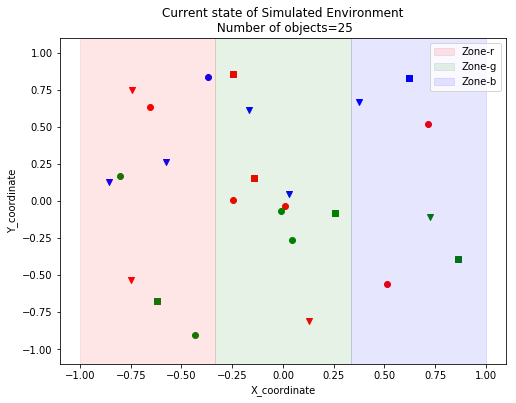

In [16]:
env=create_env(N=25,seed=25)
env_copy_super=deepcopy(env)
fig,ax=plt.subplots(figsize=(8,6))
plot_env(env,ax,legend=True)

### Let us initialise a norm and also the robot

In [4]:
rules=expand("NORMS");
for i in range(1,len(rules)):
    print_rule(rules[i],i)

------------------------------------------------
                NORM Number=1
------------------------------------------------
    PROHIBITED to
    MOVE R-SQUAREs

------------------------------------------------
                NORM Number=2
------------------------------------------------
    OBLIGATORY to
    THROW G-SQUAREs
    if you PICKUP G-SQUAREs



## Let's define the task as the combination of following subtasks:
* Pickup green and blue objects from the center
* Move all red and blue triangles and circles from a particular area to a desired area
* Throw away all the squares and circles from a target area

***The Sub-Tasks do not need to be completed in a specific order***

In [29]:
# For Pickup Subtask
target_area_p=[position(-0.3,-0.3),position(0.3,0.3)]
sub_task_p=task("pickup",["g","b"],np.nan,target_area_p,np.nan)

# For Move Subtask
target_area_m=[position(-0.5,0),position(0.2,1)]
destination_area_m=[position(-1,0.4),position(-0.7,1)]
sub_task_m=task("move",["r","b"],["triangle","square"],target_area_m,destination_area_m)

# For Throw Subtask
target_area_t=[position(-0.9,0.25),position(-0.1,0.9)]
sub_task_t=task("throw",np.nan,["square","circle"],target_area_t,np.nan)

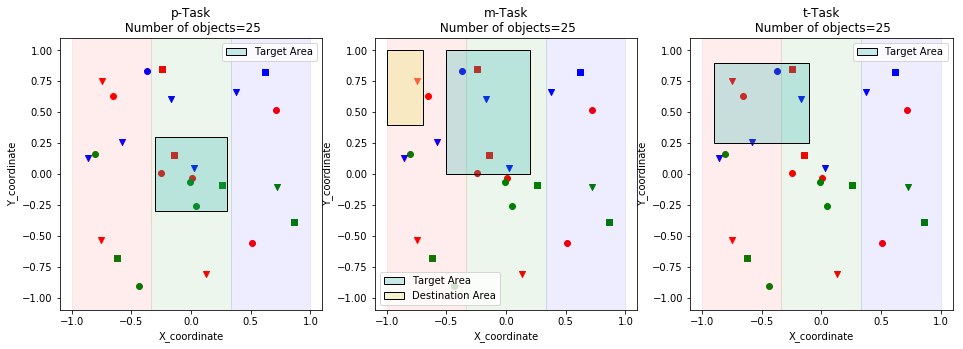

In [30]:
#Create a dict of tasks and visualise them
task_dict={"p":sub_task_p,"m":sub_task_m,"t":sub_task_t}
possible_orders=list(permutations(task_dict.keys())) #possible order of completing a task;

fig,ax=plt.subplots(1,3,figsize=(16,5))
i=0
for key,task1 in task_dict.items():
    plot_task(env,ax[i],"{}-Task".format(key),task1)
    i+=1

## Important Terminology for Evaluating Likelihood of Expression
* Set **A** = {*Action plans to complete a task without any rules*}   
    Let |A| = n<sub>1</sub>  


* Set **B** = {*Action plans to complete a task with rules*}   
    Let |B| = m<sub>1</sub>


* Set **C** = {*Action Plan P : P is in B and TCI (P)>=threshold*}   
    where *TCI: A+B &rarr; [0,1]* is Task Completion Index or a measure of how well a Plan *P* completes a task  
    Let |C| = m
    
TCI (Task) = $\prod$<sub>i=1 to num_subtasks</sub> TCI (Sub-Task <sub>i</sub>)

### Generate Set A and find it's cardinality: n<sub>1</sub> 
By iterating over the possible orders of completing a task and combining the action plans of individual subtasks

In [31]:
order_plans={}
for order in possible_orders:
    env_copy=deepcopy(env)
    print ("\nThe chosen order is:",order)
    sub_task_plans={}
    for i,subtask_key in enumerate(order,1):
        print ("Subtask={}".format(i))
        task_dict[subtask_key].print_task()
        fig,ax=plt.subplots(1, 2, sharex=True, sharey=True,figsize=(14,10))
        plot_task(env_copy,ax[0],"For:{}\nBefore the Sub-Task_{}".format(order,i),task_dict[subtask_key])
        sub_task_plans[i]=robot(task_dict[subtask_key],env_copy).make_permutations([],i,"A/{}_{}_{}".format(order[0],order[1],order[2]))
        plot_task(env_copy,ax[1],"For:{}\nAfter the Sub-Task_{}".format(order,i),task_dict[subtask_key])
        plt.savefig("./permutations/A/{}_{}_{}/subtask_{}_effect.jpeg".format(order[0],order[1],order[2],i))
        plt.close()
    order_plans[order]=sub_task_plans
    
#Aggregate action plans for individual subtasks for each order
A={}
n1=0
for order in possible_orders:
    order_plan=order_plans[order]
    A[order]=aggregate("A/{}_{}_{}".format(order[0],order[1],order[2]),order_plan)
    n1+=A[order].shape[1]


The chosen order is: ('p', 'm', 't')
Subtask=1
---------------------------------
PICKUP
['g', 'b']
nan
---------------------------------
Found 4 actionable objects
24 Permutations possible for subtask=1
Creating directory to store permutations
-------------------------------------------
       Task Completion Index=1.00
-------------------------------------------
Subtask=2
---------------------------------
MOVE
['r', 'b']
['triangle', 'square']
---------------------------------
Found 4 actionable objects
24 Permutations possible for subtask=2
Directory already available
-------------------------------------------
       Task Completion Index=1.00
-------------------------------------------
Subtask=3
---------------------------------
THROW
nan
['square', 'circle']
---------------------------------
Found 4 actionable objects
24 Permutations possible for subtask=3
Directory already available
-------------------------------------------
       Task Completion Index=1.00
-------------------

Genrating Action profile for combination=76
Genrating Action profile for combination=77
Genrating Action profile for combination=78
Genrating Action profile for combination=79
Genrating Action profile for combination=80
Genrating Action profile for combination=81
Genrating Action profile for combination=82
Genrating Action profile for combination=83
Genrating Action profile for combination=84
Genrating Action profile for combination=85
Genrating Action profile for combination=86
Genrating Action profile for combination=87
Genrating Action profile for combination=88
Genrating Action profile for combination=89
Genrating Action profile for combination=90
Genrating Action profile for combination=91
Genrating Action profile for combination=92
Genrating Action profile for combination=93
Genrating Action profile for combination=94
Genrating Action profile for combination=95
Genrating Action profile for combination=96
Genrating Action profile for combination=97
Genrating Action profile for com

Genrating Action profile for combination=275
Genrating Action profile for combination=276
Genrating Action profile for combination=277
Genrating Action profile for combination=278
Genrating Action profile for combination=279
Genrating Action profile for combination=280
Genrating Action profile for combination=281
Genrating Action profile for combination=282
Genrating Action profile for combination=283
Genrating Action profile for combination=284
Genrating Action profile for combination=285
Genrating Action profile for combination=286
Genrating Action profile for combination=287
Genrating Action profile for combination=288
Genrating Action profile for combination=289
Genrating Action profile for combination=290
Genrating Action profile for combination=291
Genrating Action profile for combination=292
Genrating Action profile for combination=293
Genrating Action profile for combination=294
Genrating Action profile for combination=295
Genrating Action profile for combination=296
Genrating 

Genrating Action profile for combination=476
Genrating Action profile for combination=477
Genrating Action profile for combination=478
Genrating Action profile for combination=479
Genrating Action profile for combination=480
Genrating Action profile for combination=481
Genrating Action profile for combination=482
Genrating Action profile for combination=483
Genrating Action profile for combination=484
Genrating Action profile for combination=485
Genrating Action profile for combination=486
Genrating Action profile for combination=487
Genrating Action profile for combination=488
Genrating Action profile for combination=489
Genrating Action profile for combination=490
Genrating Action profile for combination=491
Genrating Action profile for combination=492
Genrating Action profile for combination=493
Genrating Action profile for combination=494
Genrating Action profile for combination=495
Genrating Action profile for combination=496
Genrating Action profile for combination=497
Genrating 

Genrating Action profile for combination=663
Genrating Action profile for combination=664
Genrating Action profile for combination=665
Genrating Action profile for combination=666
Genrating Action profile for combination=667
Genrating Action profile for combination=668
Genrating Action profile for combination=669
Genrating Action profile for combination=670
Genrating Action profile for combination=671
Genrating Action profile for combination=672
Genrating Action profile for combination=673
Genrating Action profile for combination=674
Genrating Action profile for combination=675
Genrating Action profile for combination=676
Genrating Action profile for combination=677
Genrating Action profile for combination=678
Genrating Action profile for combination=679
Genrating Action profile for combination=680
Genrating Action profile for combination=681
Genrating Action profile for combination=682
Genrating Action profile for combination=683
Genrating Action profile for combination=684
Genrating 

Genrating Action profile for combination=862
Genrating Action profile for combination=863
Genrating Action profile for combination=864
Genrating Action profile for combination=865
Genrating Action profile for combination=866
Genrating Action profile for combination=867
Genrating Action profile for combination=868
Genrating Action profile for combination=869
Genrating Action profile for combination=870
Genrating Action profile for combination=871
Genrating Action profile for combination=872
Genrating Action profile for combination=873
Genrating Action profile for combination=874
Genrating Action profile for combination=875
Genrating Action profile for combination=876
Genrating Action profile for combination=877
Genrating Action profile for combination=878
Genrating Action profile for combination=879
Genrating Action profile for combination=880
Genrating Action profile for combination=881
Genrating Action profile for combination=882
Genrating Action profile for combination=883
Genrating 

Genrating Action profile for combination=1063
Genrating Action profile for combination=1064
Genrating Action profile for combination=1065
Genrating Action profile for combination=1066
Genrating Action profile for combination=1067
Genrating Action profile for combination=1068
Genrating Action profile for combination=1069
Genrating Action profile for combination=1070
Genrating Action profile for combination=1071
Genrating Action profile for combination=1072
Genrating Action profile for combination=1073
Genrating Action profile for combination=1074
Genrating Action profile for combination=1075
Genrating Action profile for combination=1076
Genrating Action profile for combination=1077
Genrating Action profile for combination=1078
Genrating Action profile for combination=1079
Genrating Action profile for combination=1080
Genrating Action profile for combination=1081
Genrating Action profile for combination=1082
Genrating Action profile for combination=1083
Genrating Action profile for combi

Genrating Action profile for combination=1273
Genrating Action profile for combination=1274
Genrating Action profile for combination=1275
Genrating Action profile for combination=1276
Genrating Action profile for combination=1277
Genrating Action profile for combination=1278
Genrating Action profile for combination=1279
Genrating Action profile for combination=1280
Genrating Action profile for combination=1281
Genrating Action profile for combination=1282
Genrating Action profile for combination=1283
Genrating Action profile for combination=1284
Genrating Action profile for combination=1285
Genrating Action profile for combination=1286
Genrating Action profile for combination=1287
Genrating Action profile for combination=1288
Genrating Action profile for combination=1289
Genrating Action profile for combination=1290
Genrating Action profile for combination=1291
Genrating Action profile for combination=1292
Genrating Action profile for combination=1293
Genrating Action profile for combi

Genrating Action profile for combination=1490
Genrating Action profile for combination=1491
Genrating Action profile for combination=1492
Genrating Action profile for combination=1493
Genrating Action profile for combination=1494
Genrating Action profile for combination=1495
Genrating Action profile for combination=1496
Genrating Action profile for combination=1497
Genrating Action profile for combination=1498
Genrating Action profile for combination=1499
Genrating Action profile for combination=1500
Genrating Action profile for combination=1501
Genrating Action profile for combination=1502
Genrating Action profile for combination=1503
Genrating Action profile for combination=1504
Genrating Action profile for combination=1505
Genrating Action profile for combination=1506
Genrating Action profile for combination=1507
Genrating Action profile for combination=1508
Genrating Action profile for combination=1509
Genrating Action profile for combination=1510
Genrating Action profile for combi

Genrating Action profile for combination=1669
Genrating Action profile for combination=1670
Genrating Action profile for combination=1671
Genrating Action profile for combination=1672
Genrating Action profile for combination=1673
Genrating Action profile for combination=1674
Genrating Action profile for combination=1675
Genrating Action profile for combination=1676
Genrating Action profile for combination=1677
Genrating Action profile for combination=1678
Genrating Action profile for combination=1679
Genrating Action profile for combination=1680
Genrating Action profile for combination=1681
Genrating Action profile for combination=1682
Genrating Action profile for combination=1683
Genrating Action profile for combination=1684
Genrating Action profile for combination=1685
Genrating Action profile for combination=1686
Genrating Action profile for combination=1687
Genrating Action profile for combination=1688
Genrating Action profile for combination=1689
Genrating Action profile for combi

Genrating Action profile for combination=1861
Genrating Action profile for combination=1862
Genrating Action profile for combination=1863
Genrating Action profile for combination=1864
Genrating Action profile for combination=1865
Genrating Action profile for combination=1866
Genrating Action profile for combination=1867
Genrating Action profile for combination=1868
Genrating Action profile for combination=1869
Genrating Action profile for combination=1870
Genrating Action profile for combination=1871
Genrating Action profile for combination=1872
Genrating Action profile for combination=1873
Genrating Action profile for combination=1874
Genrating Action profile for combination=1875
Genrating Action profile for combination=1876
Genrating Action profile for combination=1877
Genrating Action profile for combination=1878
Genrating Action profile for combination=1879
Genrating Action profile for combination=1880
Genrating Action profile for combination=1881
Genrating Action profile for combi

Genrating Action profile for combination=2076
Genrating Action profile for combination=2077
Genrating Action profile for combination=2078
Genrating Action profile for combination=2079
Genrating Action profile for combination=2080
Genrating Action profile for combination=2081
Genrating Action profile for combination=2082
Genrating Action profile for combination=2083
Genrating Action profile for combination=2084
Genrating Action profile for combination=2085
Genrating Action profile for combination=2086
Genrating Action profile for combination=2087
Genrating Action profile for combination=2088
Genrating Action profile for combination=2089
Genrating Action profile for combination=2090
Genrating Action profile for combination=2091
Genrating Action profile for combination=2092
Genrating Action profile for combination=2093
Genrating Action profile for combination=2094
Genrating Action profile for combination=2095
Genrating Action profile for combination=2096
Genrating Action profile for combi

Genrating Action profile for combination=2269
Genrating Action profile for combination=2270
Genrating Action profile for combination=2271
Genrating Action profile for combination=2272
Genrating Action profile for combination=2273
Genrating Action profile for combination=2274
Genrating Action profile for combination=2275
Genrating Action profile for combination=2276
Genrating Action profile for combination=2277
Genrating Action profile for combination=2278
Genrating Action profile for combination=2279
Genrating Action profile for combination=2280
Genrating Action profile for combination=2281
Genrating Action profile for combination=2282
Genrating Action profile for combination=2283
Genrating Action profile for combination=2284
Genrating Action profile for combination=2285
Genrating Action profile for combination=2286
Genrating Action profile for combination=2287
Genrating Action profile for combination=2288
Genrating Action profile for combination=2289
Genrating Action profile for combi

Genrating Action profile for combination=2465
Genrating Action profile for combination=2466
Genrating Action profile for combination=2467
Genrating Action profile for combination=2468
Genrating Action profile for combination=2469
Genrating Action profile for combination=2470
Genrating Action profile for combination=2471
Genrating Action profile for combination=2472
Genrating Action profile for combination=2473
Genrating Action profile for combination=2474
Genrating Action profile for combination=2475
Genrating Action profile for combination=2476
Genrating Action profile for combination=2477
Genrating Action profile for combination=2478
Genrating Action profile for combination=2479
Genrating Action profile for combination=2480
Genrating Action profile for combination=2481
Genrating Action profile for combination=2482
Genrating Action profile for combination=2483
Genrating Action profile for combination=2484
Genrating Action profile for combination=2485
Genrating Action profile for combi

Genrating Action profile for combination=2680
Genrating Action profile for combination=2681
Genrating Action profile for combination=2682
Genrating Action profile for combination=2683
Genrating Action profile for combination=2684
Genrating Action profile for combination=2685
Genrating Action profile for combination=2686
Genrating Action profile for combination=2687
Genrating Action profile for combination=2688
Genrating Action profile for combination=2689
Genrating Action profile for combination=2690
Genrating Action profile for combination=2691
Genrating Action profile for combination=2692
Genrating Action profile for combination=2693
Genrating Action profile for combination=2694
Genrating Action profile for combination=2695
Genrating Action profile for combination=2696
Genrating Action profile for combination=2697
Genrating Action profile for combination=2698
Genrating Action profile for combination=2699
Genrating Action profile for combination=2700
Genrating Action profile for combi

Genrating Action profile for combination=2899
Genrating Action profile for combination=2900
Genrating Action profile for combination=2901
Genrating Action profile for combination=2902
Genrating Action profile for combination=2903
Genrating Action profile for combination=2904
Genrating Action profile for combination=2905
Genrating Action profile for combination=2906
Genrating Action profile for combination=2907
Genrating Action profile for combination=2908
Genrating Action profile for combination=2909
Genrating Action profile for combination=2910
Genrating Action profile for combination=2911
Genrating Action profile for combination=2912
Genrating Action profile for combination=2913
Genrating Action profile for combination=2914
Genrating Action profile for combination=2915
Genrating Action profile for combination=2916
Genrating Action profile for combination=2917
Genrating Action profile for combination=2918
Genrating Action profile for combination=2919
Genrating Action profile for combi

Genrating Action profile for combination=3092
Genrating Action profile for combination=3093
Genrating Action profile for combination=3094
Genrating Action profile for combination=3095
Genrating Action profile for combination=3096
Genrating Action profile for combination=3097
Genrating Action profile for combination=3098
Genrating Action profile for combination=3099
Genrating Action profile for combination=3100
Genrating Action profile for combination=3101
Genrating Action profile for combination=3102
Genrating Action profile for combination=3103
Genrating Action profile for combination=3104
Genrating Action profile for combination=3105
Genrating Action profile for combination=3106
Genrating Action profile for combination=3107
Genrating Action profile for combination=3108
Genrating Action profile for combination=3109
Genrating Action profile for combination=3110
Genrating Action profile for combination=3111
Genrating Action profile for combination=3112
Genrating Action profile for combi

Genrating Action profile for combination=3295
Genrating Action profile for combination=3296
Genrating Action profile for combination=3297
Genrating Action profile for combination=3298
Genrating Action profile for combination=3299
Genrating Action profile for combination=3300
Genrating Action profile for combination=3301
Genrating Action profile for combination=3302
Genrating Action profile for combination=3303
Genrating Action profile for combination=3304
Genrating Action profile for combination=3305
Genrating Action profile for combination=3306
Genrating Action profile for combination=3307
Genrating Action profile for combination=3308
Genrating Action profile for combination=3309
Genrating Action profile for combination=3310
Genrating Action profile for combination=3311
Genrating Action profile for combination=3312
Genrating Action profile for combination=3313
Genrating Action profile for combination=3314
Genrating Action profile for combination=3315
Genrating Action profile for combi

Genrating Action profile for combination=3494
Genrating Action profile for combination=3495
Genrating Action profile for combination=3496
Genrating Action profile for combination=3497
Genrating Action profile for combination=3498
Genrating Action profile for combination=3499
Genrating Action profile for combination=3500
Genrating Action profile for combination=3501
Genrating Action profile for combination=3502
Genrating Action profile for combination=3503
Genrating Action profile for combination=3504
Genrating Action profile for combination=3505
Genrating Action profile for combination=3506
Genrating Action profile for combination=3507
Genrating Action profile for combination=3508
Genrating Action profile for combination=3509
Genrating Action profile for combination=3510
Genrating Action profile for combination=3511
Genrating Action profile for combination=3512
Genrating Action profile for combination=3513
Genrating Action profile for combination=3514
Genrating Action profile for combi

Genrating Action profile for combination=3689
Genrating Action profile for combination=3690
Genrating Action profile for combination=3691
Genrating Action profile for combination=3692
Genrating Action profile for combination=3693
Genrating Action profile for combination=3694
Genrating Action profile for combination=3695
Genrating Action profile for combination=3696
Genrating Action profile for combination=3697
Genrating Action profile for combination=3698
Genrating Action profile for combination=3699
Genrating Action profile for combination=3700
Genrating Action profile for combination=3701
Genrating Action profile for combination=3702
Genrating Action profile for combination=3703
Genrating Action profile for combination=3704
Genrating Action profile for combination=3705
Genrating Action profile for combination=3706
Genrating Action profile for combination=3707
Genrating Action profile for combination=3708
Genrating Action profile for combination=3709
Genrating Action profile for combi

Genrating Action profile for combination=3887
Genrating Action profile for combination=3888
Genrating Action profile for combination=3889
Genrating Action profile for combination=3890
Genrating Action profile for combination=3891
Genrating Action profile for combination=3892
Genrating Action profile for combination=3893
Genrating Action profile for combination=3894
Genrating Action profile for combination=3895
Genrating Action profile for combination=3896
Genrating Action profile for combination=3897
Genrating Action profile for combination=3898
Genrating Action profile for combination=3899
Genrating Action profile for combination=3900
Genrating Action profile for combination=3901
Genrating Action profile for combination=3902
Genrating Action profile for combination=3903
Genrating Action profile for combination=3904
Genrating Action profile for combination=3905
Genrating Action profile for combination=3906
Genrating Action profile for combination=3907
Genrating Action profile for combi

Genrating Action profile for combination=4088
Genrating Action profile for combination=4089
Genrating Action profile for combination=4090
Genrating Action profile for combination=4091
Genrating Action profile for combination=4092
Genrating Action profile for combination=4093
Genrating Action profile for combination=4094
Genrating Action profile for combination=4095
Genrating Action profile for combination=4096
Genrating Action profile for combination=4097
Genrating Action profile for combination=4098
Genrating Action profile for combination=4099
Genrating Action profile for combination=4100
Genrating Action profile for combination=4101
Genrating Action profile for combination=4102
Genrating Action profile for combination=4103
Genrating Action profile for combination=4104
Genrating Action profile for combination=4105
Genrating Action profile for combination=4106
Genrating Action profile for combination=4107
Genrating Action profile for combination=4108
Genrating Action profile for combi

Genrating Action profile for combination=4286
Genrating Action profile for combination=4287
Genrating Action profile for combination=4288
Genrating Action profile for combination=4289
Genrating Action profile for combination=4290
Genrating Action profile for combination=4291
Genrating Action profile for combination=4292
Genrating Action profile for combination=4293
Genrating Action profile for combination=4294
Genrating Action profile for combination=4295
Genrating Action profile for combination=4296
Genrating Action profile for combination=4297
Genrating Action profile for combination=4298
Genrating Action profile for combination=4299
Genrating Action profile for combination=4300
Genrating Action profile for combination=4301
Genrating Action profile for combination=4302
Genrating Action profile for combination=4303
Genrating Action profile for combination=4304
Genrating Action profile for combination=4305
Genrating Action profile for combination=4306
Genrating Action profile for combi

Genrating Action profile for combination=4472
Genrating Action profile for combination=4473
Genrating Action profile for combination=4474
Genrating Action profile for combination=4475
Genrating Action profile for combination=4476
Genrating Action profile for combination=4477
Genrating Action profile for combination=4478
Genrating Action profile for combination=4479
Genrating Action profile for combination=4480
Genrating Action profile for combination=4481
Genrating Action profile for combination=4482
Genrating Action profile for combination=4483
Genrating Action profile for combination=4484
Genrating Action profile for combination=4485
Genrating Action profile for combination=4486
Genrating Action profile for combination=4487
Genrating Action profile for combination=4488
Genrating Action profile for combination=4489
Genrating Action profile for combination=4490
Genrating Action profile for combination=4491
Genrating Action profile for combination=4492
Genrating Action profile for combi

Genrating Action profile for combination=4676
Genrating Action profile for combination=4677
Genrating Action profile for combination=4678
Genrating Action profile for combination=4679
Genrating Action profile for combination=4680
Genrating Action profile for combination=4681
Genrating Action profile for combination=4682
Genrating Action profile for combination=4683
Genrating Action profile for combination=4684
Genrating Action profile for combination=4685
Genrating Action profile for combination=4686
Genrating Action profile for combination=4687
Genrating Action profile for combination=4688
Genrating Action profile for combination=4689
Genrating Action profile for combination=4690
Genrating Action profile for combination=4691
Genrating Action profile for combination=4692
Genrating Action profile for combination=4693
Genrating Action profile for combination=4694
Genrating Action profile for combination=4695
Genrating Action profile for combination=4696
Genrating Action profile for combi

Genrating Action profile for combination=4887
Genrating Action profile for combination=4888
Genrating Action profile for combination=4889
Genrating Action profile for combination=4890
Genrating Action profile for combination=4891
Genrating Action profile for combination=4892
Genrating Action profile for combination=4893
Genrating Action profile for combination=4894
Genrating Action profile for combination=4895
Genrating Action profile for combination=4896
Genrating Action profile for combination=4897
Genrating Action profile for combination=4898
Genrating Action profile for combination=4899
Genrating Action profile for combination=4900
Genrating Action profile for combination=4901
Genrating Action profile for combination=4902
Genrating Action profile for combination=4903
Genrating Action profile for combination=4904
Genrating Action profile for combination=4905
Genrating Action profile for combination=4906
Genrating Action profile for combination=4907
Genrating Action profile for combi

Genrating Action profile for combination=5091
Genrating Action profile for combination=5092
Genrating Action profile for combination=5093
Genrating Action profile for combination=5094
Genrating Action profile for combination=5095
Genrating Action profile for combination=5096
Genrating Action profile for combination=5097
Genrating Action profile for combination=5098
Genrating Action profile for combination=5099
Genrating Action profile for combination=5100
Genrating Action profile for combination=5101
Genrating Action profile for combination=5102
Genrating Action profile for combination=5103
Genrating Action profile for combination=5104
Genrating Action profile for combination=5105
Genrating Action profile for combination=5106
Genrating Action profile for combination=5107
Genrating Action profile for combination=5108
Genrating Action profile for combination=5109
Genrating Action profile for combination=5110
Genrating Action profile for combination=5111
Genrating Action profile for combi

Genrating Action profile for combination=5300
Genrating Action profile for combination=5301
Genrating Action profile for combination=5302
Genrating Action profile for combination=5303
Genrating Action profile for combination=5304
Genrating Action profile for combination=5305
Genrating Action profile for combination=5306
Genrating Action profile for combination=5307
Genrating Action profile for combination=5308
Genrating Action profile for combination=5309
Genrating Action profile for combination=5310
Genrating Action profile for combination=5311
Genrating Action profile for combination=5312
Genrating Action profile for combination=5313
Genrating Action profile for combination=5314
Genrating Action profile for combination=5315
Genrating Action profile for combination=5316
Genrating Action profile for combination=5317
Genrating Action profile for combination=5318
Genrating Action profile for combination=5319
Genrating Action profile for combination=5320
Genrating Action profile for combi

Genrating Action profile for combination=5479
Genrating Action profile for combination=5480
Genrating Action profile for combination=5481
Genrating Action profile for combination=5482
Genrating Action profile for combination=5483
Genrating Action profile for combination=5484
Genrating Action profile for combination=5485
Genrating Action profile for combination=5486
Genrating Action profile for combination=5487
Genrating Action profile for combination=5488
Genrating Action profile for combination=5489
Genrating Action profile for combination=5490
Genrating Action profile for combination=5491
Genrating Action profile for combination=5492
Genrating Action profile for combination=5493
Genrating Action profile for combination=5494
Genrating Action profile for combination=5495
Genrating Action profile for combination=5496
Genrating Action profile for combination=5497
Genrating Action profile for combination=5498
Genrating Action profile for combination=5499
Genrating Action profile for combi

Genrating Action profile for combination=5669
Genrating Action profile for combination=5670
Genrating Action profile for combination=5671
Genrating Action profile for combination=5672
Genrating Action profile for combination=5673
Genrating Action profile for combination=5674
Genrating Action profile for combination=5675
Genrating Action profile for combination=5676
Genrating Action profile for combination=5677
Genrating Action profile for combination=5678
Genrating Action profile for combination=5679
Genrating Action profile for combination=5680
Genrating Action profile for combination=5681
Genrating Action profile for combination=5682
Genrating Action profile for combination=5683
Genrating Action profile for combination=5684
Genrating Action profile for combination=5685
Genrating Action profile for combination=5686
Genrating Action profile for combination=5687
Genrating Action profile for combination=5688
Genrating Action profile for combination=5689
Genrating Action profile for combi

Genrating Action profile for combination=5861
Genrating Action profile for combination=5862
Genrating Action profile for combination=5863
Genrating Action profile for combination=5864
Genrating Action profile for combination=5865
Genrating Action profile for combination=5866
Genrating Action profile for combination=5867
Genrating Action profile for combination=5868
Genrating Action profile for combination=5869
Genrating Action profile for combination=5870
Genrating Action profile for combination=5871
Genrating Action profile for combination=5872
Genrating Action profile for combination=5873
Genrating Action profile for combination=5874
Genrating Action profile for combination=5875
Genrating Action profile for combination=5876
Genrating Action profile for combination=5877
Genrating Action profile for combination=5878
Genrating Action profile for combination=5879
Genrating Action profile for combination=5880
Genrating Action profile for combination=5881
Genrating Action profile for combi

Genrating Action profile for combination=6060
Genrating Action profile for combination=6061
Genrating Action profile for combination=6062
Genrating Action profile for combination=6063
Genrating Action profile for combination=6064
Genrating Action profile for combination=6065
Genrating Action profile for combination=6066
Genrating Action profile for combination=6067
Genrating Action profile for combination=6068
Genrating Action profile for combination=6069
Genrating Action profile for combination=6070
Genrating Action profile for combination=6071
Genrating Action profile for combination=6072
Genrating Action profile for combination=6073
Genrating Action profile for combination=6074
Genrating Action profile for combination=6075
Genrating Action profile for combination=6076
Genrating Action profile for combination=6077
Genrating Action profile for combination=6078
Genrating Action profile for combination=6079
Genrating Action profile for combination=6080
Genrating Action profile for combi

Genrating Action profile for combination=6253
Genrating Action profile for combination=6254
Genrating Action profile for combination=6255
Genrating Action profile for combination=6256
Genrating Action profile for combination=6257
Genrating Action profile for combination=6258
Genrating Action profile for combination=6259
Genrating Action profile for combination=6260
Genrating Action profile for combination=6261
Genrating Action profile for combination=6262
Genrating Action profile for combination=6263
Genrating Action profile for combination=6264
Genrating Action profile for combination=6265
Genrating Action profile for combination=6266
Genrating Action profile for combination=6267
Genrating Action profile for combination=6268
Genrating Action profile for combination=6269
Genrating Action profile for combination=6270
Genrating Action profile for combination=6271
Genrating Action profile for combination=6272
Genrating Action profile for combination=6273
Genrating Action profile for combi

Genrating Action profile for combination=6432
Genrating Action profile for combination=6433
Genrating Action profile for combination=6434
Genrating Action profile for combination=6435
Genrating Action profile for combination=6436
Genrating Action profile for combination=6437
Genrating Action profile for combination=6438
Genrating Action profile for combination=6439
Genrating Action profile for combination=6440
Genrating Action profile for combination=6441
Genrating Action profile for combination=6442
Genrating Action profile for combination=6443
Genrating Action profile for combination=6444
Genrating Action profile for combination=6445
Genrating Action profile for combination=6446
Genrating Action profile for combination=6447
Genrating Action profile for combination=6448
Genrating Action profile for combination=6449
Genrating Action profile for combination=6450
Genrating Action profile for combination=6451
Genrating Action profile for combination=6452
Genrating Action profile for combi

Genrating Action profile for combination=6614
Genrating Action profile for combination=6615
Genrating Action profile for combination=6616
Genrating Action profile for combination=6617
Genrating Action profile for combination=6618
Genrating Action profile for combination=6619
Genrating Action profile for combination=6620
Genrating Action profile for combination=6621
Genrating Action profile for combination=6622
Genrating Action profile for combination=6623
Genrating Action profile for combination=6624
Genrating Action profile for combination=6625
Genrating Action profile for combination=6626
Genrating Action profile for combination=6627
Genrating Action profile for combination=6628
Genrating Action profile for combination=6629
Genrating Action profile for combination=6630
Genrating Action profile for combination=6631
Genrating Action profile for combination=6632
Genrating Action profile for combination=6633
Genrating Action profile for combination=6634
Genrating Action profile for combi

Genrating Action profile for combination=6808
Genrating Action profile for combination=6809
Genrating Action profile for combination=6810
Genrating Action profile for combination=6811
Genrating Action profile for combination=6812
Genrating Action profile for combination=6813
Genrating Action profile for combination=6814
Genrating Action profile for combination=6815
Genrating Action profile for combination=6816
Genrating Action profile for combination=6817
Genrating Action profile for combination=6818
Genrating Action profile for combination=6819
Genrating Action profile for combination=6820
Genrating Action profile for combination=6821
Genrating Action profile for combination=6822
Genrating Action profile for combination=6823
Genrating Action profile for combination=6824
Genrating Action profile for combination=6825
Genrating Action profile for combination=6826
Genrating Action profile for combination=6827
Genrating Action profile for combination=6828
Genrating Action profile for combi

Genrating Action profile for combination=7021
Genrating Action profile for combination=7022
Genrating Action profile for combination=7023
Genrating Action profile for combination=7024
Genrating Action profile for combination=7025
Genrating Action profile for combination=7026
Genrating Action profile for combination=7027
Genrating Action profile for combination=7028
Genrating Action profile for combination=7029
Genrating Action profile for combination=7030
Genrating Action profile for combination=7031
Genrating Action profile for combination=7032
Genrating Action profile for combination=7033
Genrating Action profile for combination=7034
Genrating Action profile for combination=7035
Genrating Action profile for combination=7036
Genrating Action profile for combination=7037
Genrating Action profile for combination=7038
Genrating Action profile for combination=7039
Genrating Action profile for combination=7040
Genrating Action profile for combination=7041
Genrating Action profile for combi

Genrating Action profile for combination=7236
Genrating Action profile for combination=7237
Genrating Action profile for combination=7238
Genrating Action profile for combination=7239
Genrating Action profile for combination=7240
Genrating Action profile for combination=7241
Genrating Action profile for combination=7242
Genrating Action profile for combination=7243
Genrating Action profile for combination=7244
Genrating Action profile for combination=7245
Genrating Action profile for combination=7246
Genrating Action profile for combination=7247
Genrating Action profile for combination=7248
Genrating Action profile for combination=7249
Genrating Action profile for combination=7250
Genrating Action profile for combination=7251
Genrating Action profile for combination=7252
Genrating Action profile for combination=7253
Genrating Action profile for combination=7254
Genrating Action profile for combination=7255
Genrating Action profile for combination=7256
Genrating Action profile for combi

Genrating Action profile for combination=7437
Genrating Action profile for combination=7438
Genrating Action profile for combination=7439
Genrating Action profile for combination=7440
Genrating Action profile for combination=7441
Genrating Action profile for combination=7442
Genrating Action profile for combination=7443
Genrating Action profile for combination=7444
Genrating Action profile for combination=7445
Genrating Action profile for combination=7446
Genrating Action profile for combination=7447
Genrating Action profile for combination=7448
Genrating Action profile for combination=7449
Genrating Action profile for combination=7450
Genrating Action profile for combination=7451
Genrating Action profile for combination=7452
Genrating Action profile for combination=7453
Genrating Action profile for combination=7454
Genrating Action profile for combination=7455
Genrating Action profile for combination=7456
Genrating Action profile for combination=7457
Genrating Action profile for combi

Genrating Action profile for combination=7645
Genrating Action profile for combination=7646
Genrating Action profile for combination=7647
Genrating Action profile for combination=7648
Genrating Action profile for combination=7649
Genrating Action profile for combination=7650
Genrating Action profile for combination=7651
Genrating Action profile for combination=7652
Genrating Action profile for combination=7653
Genrating Action profile for combination=7654
Genrating Action profile for combination=7655
Genrating Action profile for combination=7656
Genrating Action profile for combination=7657
Genrating Action profile for combination=7658
Genrating Action profile for combination=7659
Genrating Action profile for combination=7660
Genrating Action profile for combination=7661
Genrating Action profile for combination=7662
Genrating Action profile for combination=7663
Genrating Action profile for combination=7664
Genrating Action profile for combination=7665
Genrating Action profile for combi

Genrating Action profile for combination=7824
Genrating Action profile for combination=7825
Genrating Action profile for combination=7826
Genrating Action profile for combination=7827
Genrating Action profile for combination=7828
Genrating Action profile for combination=7829
Genrating Action profile for combination=7830
Genrating Action profile for combination=7831
Genrating Action profile for combination=7832
Genrating Action profile for combination=7833
Genrating Action profile for combination=7834
Genrating Action profile for combination=7835
Genrating Action profile for combination=7836
Genrating Action profile for combination=7837
Genrating Action profile for combination=7838
Genrating Action profile for combination=7839
Genrating Action profile for combination=7840
Genrating Action profile for combination=7841
Genrating Action profile for combination=7842
Genrating Action profile for combination=7843
Genrating Action profile for combination=7844
Genrating Action profile for combi

Genrating Action profile for combination=8006
Genrating Action profile for combination=8007
Genrating Action profile for combination=8008
Genrating Action profile for combination=8009
Genrating Action profile for combination=8010
Genrating Action profile for combination=8011
Genrating Action profile for combination=8012
Genrating Action profile for combination=8013
Genrating Action profile for combination=8014
Genrating Action profile for combination=8015
Genrating Action profile for combination=8016
Genrating Action profile for combination=8017
Genrating Action profile for combination=8018
Genrating Action profile for combination=8019
Genrating Action profile for combination=8020
Genrating Action profile for combination=8021
Genrating Action profile for combination=8022
Genrating Action profile for combination=8023
Genrating Action profile for combination=8024
Genrating Action profile for combination=8025
Genrating Action profile for combination=8026
Genrating Action profile for combi

Genrating Action profile for combination=8188
Genrating Action profile for combination=8189
Genrating Action profile for combination=8190
Genrating Action profile for combination=8191
Genrating Action profile for combination=8192
Genrating Action profile for combination=8193
Genrating Action profile for combination=8194
Genrating Action profile for combination=8195
Genrating Action profile for combination=8196
Genrating Action profile for combination=8197
Genrating Action profile for combination=8198
Genrating Action profile for combination=8199
Genrating Action profile for combination=8200
Genrating Action profile for combination=8201
Genrating Action profile for combination=8202
Genrating Action profile for combination=8203
Genrating Action profile for combination=8204
Genrating Action profile for combination=8205
Genrating Action profile for combination=8206
Genrating Action profile for combination=8207
Genrating Action profile for combination=8208
Genrating Action profile for combi

Genrating Action profile for combination=8382
Genrating Action profile for combination=8383
Genrating Action profile for combination=8384
Genrating Action profile for combination=8385
Genrating Action profile for combination=8386
Genrating Action profile for combination=8387
Genrating Action profile for combination=8388
Genrating Action profile for combination=8389
Genrating Action profile for combination=8390
Genrating Action profile for combination=8391
Genrating Action profile for combination=8392
Genrating Action profile for combination=8393
Genrating Action profile for combination=8394
Genrating Action profile for combination=8395
Genrating Action profile for combination=8396
Genrating Action profile for combination=8397
Genrating Action profile for combination=8398
Genrating Action profile for combination=8399
Genrating Action profile for combination=8400
Genrating Action profile for combination=8401
Genrating Action profile for combination=8402
Genrating Action profile for combi

Genrating Action profile for combination=8578
Genrating Action profile for combination=8579
Genrating Action profile for combination=8580
Genrating Action profile for combination=8581
Genrating Action profile for combination=8582
Genrating Action profile for combination=8583
Genrating Action profile for combination=8584
Genrating Action profile for combination=8585
Genrating Action profile for combination=8586
Genrating Action profile for combination=8587
Genrating Action profile for combination=8588
Genrating Action profile for combination=8589
Genrating Action profile for combination=8590
Genrating Action profile for combination=8591
Genrating Action profile for combination=8592
Genrating Action profile for combination=8593
Genrating Action profile for combination=8594
Genrating Action profile for combination=8595
Genrating Action profile for combination=8596
Genrating Action profile for combination=8597
Genrating Action profile for combination=8598
Genrating Action profile for combi

Genrating Action profile for combination=8762
Genrating Action profile for combination=8763
Genrating Action profile for combination=8764
Genrating Action profile for combination=8765
Genrating Action profile for combination=8766
Genrating Action profile for combination=8767
Genrating Action profile for combination=8768
Genrating Action profile for combination=8769
Genrating Action profile for combination=8770
Genrating Action profile for combination=8771
Genrating Action profile for combination=8772
Genrating Action profile for combination=8773
Genrating Action profile for combination=8774
Genrating Action profile for combination=8775
Genrating Action profile for combination=8776
Genrating Action profile for combination=8777
Genrating Action profile for combination=8778
Genrating Action profile for combination=8779
Genrating Action profile for combination=8780
Genrating Action profile for combination=8781
Genrating Action profile for combination=8782
Genrating Action profile for combi

Genrating Action profile for combination=8943
Genrating Action profile for combination=8944
Genrating Action profile for combination=8945
Genrating Action profile for combination=8946
Genrating Action profile for combination=8947
Genrating Action profile for combination=8948
Genrating Action profile for combination=8949
Genrating Action profile for combination=8950
Genrating Action profile for combination=8951
Genrating Action profile for combination=8952
Genrating Action profile for combination=8953
Genrating Action profile for combination=8954
Genrating Action profile for combination=8955
Genrating Action profile for combination=8956
Genrating Action profile for combination=8957
Genrating Action profile for combination=8958
Genrating Action profile for combination=8959
Genrating Action profile for combination=8960
Genrating Action profile for combination=8961
Genrating Action profile for combination=8962
Genrating Action profile for combination=8963
Genrating Action profile for combi

Genrating Action profile for combination=9126
Genrating Action profile for combination=9127
Genrating Action profile for combination=9128
Genrating Action profile for combination=9129
Genrating Action profile for combination=9130
Genrating Action profile for combination=9131
Genrating Action profile for combination=9132
Genrating Action profile for combination=9133
Genrating Action profile for combination=9134
Genrating Action profile for combination=9135
Genrating Action profile for combination=9136
Genrating Action profile for combination=9137
Genrating Action profile for combination=9138
Genrating Action profile for combination=9139
Genrating Action profile for combination=9140
Genrating Action profile for combination=9141
Genrating Action profile for combination=9142
Genrating Action profile for combination=9143
Genrating Action profile for combination=9144
Genrating Action profile for combination=9145
Genrating Action profile for combination=9146
Genrating Action profile for combi

Genrating Action profile for combination=9331
Genrating Action profile for combination=9332
Genrating Action profile for combination=9333
Genrating Action profile for combination=9334
Genrating Action profile for combination=9335
Genrating Action profile for combination=9336
Genrating Action profile for combination=9337
Genrating Action profile for combination=9338
Genrating Action profile for combination=9339
Genrating Action profile for combination=9340
Genrating Action profile for combination=9341
Genrating Action profile for combination=9342
Genrating Action profile for combination=9343
Genrating Action profile for combination=9344
Genrating Action profile for combination=9345
Genrating Action profile for combination=9346
Genrating Action profile for combination=9347
Genrating Action profile for combination=9348
Genrating Action profile for combination=9349
Genrating Action profile for combination=9350
Genrating Action profile for combination=9351
Genrating Action profile for combi

Genrating Action profile for combination=9548
Genrating Action profile for combination=9549
Genrating Action profile for combination=9550
Genrating Action profile for combination=9551
Genrating Action profile for combination=9552
Genrating Action profile for combination=9553
Genrating Action profile for combination=9554
Genrating Action profile for combination=9555
Genrating Action profile for combination=9556
Genrating Action profile for combination=9557
Genrating Action profile for combination=9558
Genrating Action profile for combination=9559
Genrating Action profile for combination=9560
Genrating Action profile for combination=9561
Genrating Action profile for combination=9562
Genrating Action profile for combination=9563
Genrating Action profile for combination=9564
Genrating Action profile for combination=9565
Genrating Action profile for combination=9566
Genrating Action profile for combination=9567
Genrating Action profile for combination=9568
Genrating Action profile for combi

Genrating Action profile for combination=9754
Genrating Action profile for combination=9755
Genrating Action profile for combination=9756
Genrating Action profile for combination=9757
Genrating Action profile for combination=9758
Genrating Action profile for combination=9759
Genrating Action profile for combination=9760
Genrating Action profile for combination=9761
Genrating Action profile for combination=9762
Genrating Action profile for combination=9763
Genrating Action profile for combination=9764
Genrating Action profile for combination=9765
Genrating Action profile for combination=9766
Genrating Action profile for combination=9767
Genrating Action profile for combination=9768
Genrating Action profile for combination=9769
Genrating Action profile for combination=9770
Genrating Action profile for combination=9771
Genrating Action profile for combination=9772
Genrating Action profile for combination=9773
Genrating Action profile for combination=9774
Genrating Action profile for combi

Genrating Action profile for combination=9936
Genrating Action profile for combination=9937
Genrating Action profile for combination=9938
Genrating Action profile for combination=9939
Genrating Action profile for combination=9940
Genrating Action profile for combination=9941
Genrating Action profile for combination=9942
Genrating Action profile for combination=9943
Genrating Action profile for combination=9944
Genrating Action profile for combination=9945
Genrating Action profile for combination=9946
Genrating Action profile for combination=9947
Genrating Action profile for combination=9948
Genrating Action profile for combination=9949
Genrating Action profile for combination=9950
Genrating Action profile for combination=9951
Genrating Action profile for combination=9952
Genrating Action profile for combination=9953
Genrating Action profile for combination=9954
Genrating Action profile for combination=9955
Genrating Action profile for combination=9956
Genrating Action profile for combi

Genrating Action profile for combination=10123
Genrating Action profile for combination=10124
Genrating Action profile for combination=10125
Genrating Action profile for combination=10126
Genrating Action profile for combination=10127
Genrating Action profile for combination=10128
Genrating Action profile for combination=10129
Genrating Action profile for combination=10130
Genrating Action profile for combination=10131
Genrating Action profile for combination=10132
Genrating Action profile for combination=10133
Genrating Action profile for combination=10134
Genrating Action profile for combination=10135
Genrating Action profile for combination=10136
Genrating Action profile for combination=10137
Genrating Action profile for combination=10138
Genrating Action profile for combination=10139
Genrating Action profile for combination=10140
Genrating Action profile for combination=10141
Genrating Action profile for combination=10142
Genrating Action profile for combination=10143
Genrating Act

Genrating Action profile for combination=10331
Genrating Action profile for combination=10332
Genrating Action profile for combination=10333
Genrating Action profile for combination=10334
Genrating Action profile for combination=10335
Genrating Action profile for combination=10336
Genrating Action profile for combination=10337
Genrating Action profile for combination=10338
Genrating Action profile for combination=10339
Genrating Action profile for combination=10340
Genrating Action profile for combination=10341
Genrating Action profile for combination=10342
Genrating Action profile for combination=10343
Genrating Action profile for combination=10344
Genrating Action profile for combination=10345
Genrating Action profile for combination=10346
Genrating Action profile for combination=10347
Genrating Action profile for combination=10348
Genrating Action profile for combination=10349
Genrating Action profile for combination=10350
Genrating Action profile for combination=10351
Genrating Act

Genrating Action profile for combination=10508
Genrating Action profile for combination=10509
Genrating Action profile for combination=10510
Genrating Action profile for combination=10511
Genrating Action profile for combination=10512
Genrating Action profile for combination=10513
Genrating Action profile for combination=10514
Genrating Action profile for combination=10515
Genrating Action profile for combination=10516
Genrating Action profile for combination=10517
Genrating Action profile for combination=10518
Genrating Action profile for combination=10519
Genrating Action profile for combination=10520
Genrating Action profile for combination=10521
Genrating Action profile for combination=10522
Genrating Action profile for combination=10523
Genrating Action profile for combination=10524
Genrating Action profile for combination=10525
Genrating Action profile for combination=10526
Genrating Action profile for combination=10527
Genrating Action profile for combination=10528
Genrating Act

Genrating Action profile for combination=10698
Genrating Action profile for combination=10699
Genrating Action profile for combination=10700
Genrating Action profile for combination=10701
Genrating Action profile for combination=10702
Genrating Action profile for combination=10703
Genrating Action profile for combination=10704
Genrating Action profile for combination=10705
Genrating Action profile for combination=10706
Genrating Action profile for combination=10707
Genrating Action profile for combination=10708
Genrating Action profile for combination=10709
Genrating Action profile for combination=10710
Genrating Action profile for combination=10711
Genrating Action profile for combination=10712
Genrating Action profile for combination=10713
Genrating Action profile for combination=10714
Genrating Action profile for combination=10715
Genrating Action profile for combination=10716
Genrating Action profile for combination=10717
Genrating Action profile for combination=10718
Genrating Act

Genrating Action profile for combination=10878
Genrating Action profile for combination=10879
Genrating Action profile for combination=10880
Genrating Action profile for combination=10881
Genrating Action profile for combination=10882
Genrating Action profile for combination=10883
Genrating Action profile for combination=10884
Genrating Action profile for combination=10885
Genrating Action profile for combination=10886
Genrating Action profile for combination=10887
Genrating Action profile for combination=10888
Genrating Action profile for combination=10889
Genrating Action profile for combination=10890
Genrating Action profile for combination=10891
Genrating Action profile for combination=10892
Genrating Action profile for combination=10893
Genrating Action profile for combination=10894
Genrating Action profile for combination=10895
Genrating Action profile for combination=10896
Genrating Action profile for combination=10897
Genrating Action profile for combination=10898
Genrating Act

Genrating Action profile for combination=11054
Genrating Action profile for combination=11055
Genrating Action profile for combination=11056
Genrating Action profile for combination=11057
Genrating Action profile for combination=11058
Genrating Action profile for combination=11059
Genrating Action profile for combination=11060
Genrating Action profile for combination=11061
Genrating Action profile for combination=11062
Genrating Action profile for combination=11063
Genrating Action profile for combination=11064
Genrating Action profile for combination=11065
Genrating Action profile for combination=11066
Genrating Action profile for combination=11067
Genrating Action profile for combination=11068
Genrating Action profile for combination=11069
Genrating Action profile for combination=11070
Genrating Action profile for combination=11071
Genrating Action profile for combination=11072
Genrating Action profile for combination=11073
Genrating Action profile for combination=11074
Genrating Act

Genrating Action profile for combination=11262
Genrating Action profile for combination=11263
Genrating Action profile for combination=11264
Genrating Action profile for combination=11265
Genrating Action profile for combination=11266
Genrating Action profile for combination=11267
Genrating Action profile for combination=11268
Genrating Action profile for combination=11269
Genrating Action profile for combination=11270
Genrating Action profile for combination=11271
Genrating Action profile for combination=11272
Genrating Action profile for combination=11273
Genrating Action profile for combination=11274
Genrating Action profile for combination=11275
Genrating Action profile for combination=11276
Genrating Action profile for combination=11277
Genrating Action profile for combination=11278
Genrating Action profile for combination=11279
Genrating Action profile for combination=11280
Genrating Action profile for combination=11281
Genrating Action profile for combination=11282
Genrating Act

Genrating Action profile for combination=11460
Genrating Action profile for combination=11461
Genrating Action profile for combination=11462
Genrating Action profile for combination=11463
Genrating Action profile for combination=11464
Genrating Action profile for combination=11465
Genrating Action profile for combination=11466
Genrating Action profile for combination=11467
Genrating Action profile for combination=11468
Genrating Action profile for combination=11469
Genrating Action profile for combination=11470
Genrating Action profile for combination=11471
Genrating Action profile for combination=11472
Genrating Action profile for combination=11473
Genrating Action profile for combination=11474
Genrating Action profile for combination=11475
Genrating Action profile for combination=11476
Genrating Action profile for combination=11477
Genrating Action profile for combination=11478
Genrating Action profile for combination=11479
Genrating Action profile for combination=11480
Genrating Act

Genrating Action profile for combination=11639
Genrating Action profile for combination=11640
Genrating Action profile for combination=11641
Genrating Action profile for combination=11642
Genrating Action profile for combination=11643
Genrating Action profile for combination=11644
Genrating Action profile for combination=11645
Genrating Action profile for combination=11646
Genrating Action profile for combination=11647
Genrating Action profile for combination=11648
Genrating Action profile for combination=11649
Genrating Action profile for combination=11650
Genrating Action profile for combination=11651
Genrating Action profile for combination=11652
Genrating Action profile for combination=11653
Genrating Action profile for combination=11654
Genrating Action profile for combination=11655
Genrating Action profile for combination=11656
Genrating Action profile for combination=11657
Genrating Action profile for combination=11658
Genrating Action profile for combination=11659
Genrating Act

Genrating Action profile for combination=11840
Genrating Action profile for combination=11841
Genrating Action profile for combination=11842
Genrating Action profile for combination=11843
Genrating Action profile for combination=11844
Genrating Action profile for combination=11845
Genrating Action profile for combination=11846
Genrating Action profile for combination=11847
Genrating Action profile for combination=11848
Genrating Action profile for combination=11849
Genrating Action profile for combination=11850
Genrating Action profile for combination=11851
Genrating Action profile for combination=11852
Genrating Action profile for combination=11853
Genrating Action profile for combination=11854
Genrating Action profile for combination=11855
Genrating Action profile for combination=11856
Genrating Action profile for combination=11857
Genrating Action profile for combination=11858
Genrating Action profile for combination=11859
Genrating Action profile for combination=11860
Genrating Act

Genrating Action profile for combination=12025
Genrating Action profile for combination=12026
Genrating Action profile for combination=12027
Genrating Action profile for combination=12028
Genrating Action profile for combination=12029
Genrating Action profile for combination=12030
Genrating Action profile for combination=12031
Genrating Action profile for combination=12032
Genrating Action profile for combination=12033
Genrating Action profile for combination=12034
Genrating Action profile for combination=12035
Genrating Action profile for combination=12036
Genrating Action profile for combination=12037
Genrating Action profile for combination=12038
Genrating Action profile for combination=12039
Genrating Action profile for combination=12040
Genrating Action profile for combination=12041
Genrating Action profile for combination=12042
Genrating Action profile for combination=12043
Genrating Action profile for combination=12044
Genrating Action profile for combination=12045
Genrating Act

Genrating Action profile for combination=12200
Genrating Action profile for combination=12201
Genrating Action profile for combination=12202
Genrating Action profile for combination=12203
Genrating Action profile for combination=12204
Genrating Action profile for combination=12205
Genrating Action profile for combination=12206
Genrating Action profile for combination=12207
Genrating Action profile for combination=12208
Genrating Action profile for combination=12209
Genrating Action profile for combination=12210
Genrating Action profile for combination=12211
Genrating Action profile for combination=12212
Genrating Action profile for combination=12213
Genrating Action profile for combination=12214
Genrating Action profile for combination=12215
Genrating Action profile for combination=12216
Genrating Action profile for combination=12217
Genrating Action profile for combination=12218
Genrating Action profile for combination=12219
Genrating Action profile for combination=12220
Genrating Act

Genrating Action profile for combination=12381
Genrating Action profile for combination=12382
Genrating Action profile for combination=12383
Genrating Action profile for combination=12384
Genrating Action profile for combination=12385
Genrating Action profile for combination=12386
Genrating Action profile for combination=12387
Genrating Action profile for combination=12388
Genrating Action profile for combination=12389
Genrating Action profile for combination=12390
Genrating Action profile for combination=12391
Genrating Action profile for combination=12392
Genrating Action profile for combination=12393
Genrating Action profile for combination=12394
Genrating Action profile for combination=12395
Genrating Action profile for combination=12396
Genrating Action profile for combination=12397
Genrating Action profile for combination=12398
Genrating Action profile for combination=12399
Genrating Action profile for combination=12400
Genrating Action profile for combination=12401
Genrating Act

Genrating Action profile for combination=12565
Genrating Action profile for combination=12566
Genrating Action profile for combination=12567
Genrating Action profile for combination=12568
Genrating Action profile for combination=12569
Genrating Action profile for combination=12570
Genrating Action profile for combination=12571
Genrating Action profile for combination=12572
Genrating Action profile for combination=12573
Genrating Action profile for combination=12574
Genrating Action profile for combination=12575
Genrating Action profile for combination=12576
Genrating Action profile for combination=12577
Genrating Action profile for combination=12578
Genrating Action profile for combination=12579
Genrating Action profile for combination=12580
Genrating Action profile for combination=12581
Genrating Action profile for combination=12582
Genrating Action profile for combination=12583
Genrating Action profile for combination=12584
Genrating Action profile for combination=12585
Genrating Act

Genrating Action profile for combination=12749
Genrating Action profile for combination=12750
Genrating Action profile for combination=12751
Genrating Action profile for combination=12752
Genrating Action profile for combination=12753
Genrating Action profile for combination=12754
Genrating Action profile for combination=12755
Genrating Action profile for combination=12756
Genrating Action profile for combination=12757
Genrating Action profile for combination=12758
Genrating Action profile for combination=12759
Genrating Action profile for combination=12760
Genrating Action profile for combination=12761
Genrating Action profile for combination=12762
Genrating Action profile for combination=12763
Genrating Action profile for combination=12764
Genrating Action profile for combination=12765
Genrating Action profile for combination=12766
Genrating Action profile for combination=12767
Genrating Action profile for combination=12768
Genrating Action profile for combination=12769
Genrating Act

Genrating Action profile for combination=12926
Genrating Action profile for combination=12927
Genrating Action profile for combination=12928
Genrating Action profile for combination=12929
Genrating Action profile for combination=12930
Genrating Action profile for combination=12931
Genrating Action profile for combination=12932
Genrating Action profile for combination=12933
Genrating Action profile for combination=12934
Genrating Action profile for combination=12935
Genrating Action profile for combination=12936
Genrating Action profile for combination=12937
Genrating Action profile for combination=12938
Genrating Action profile for combination=12939
Genrating Action profile for combination=12940
Genrating Action profile for combination=12941
Genrating Action profile for combination=12942
Genrating Action profile for combination=12943
Genrating Action profile for combination=12944
Genrating Action profile for combination=12945
Genrating Action profile for combination=12946
Genrating Act

Genrating Action profile for combination=13118
Genrating Action profile for combination=13119
Genrating Action profile for combination=13120
Genrating Action profile for combination=13121
Genrating Action profile for combination=13122
Genrating Action profile for combination=13123
Genrating Action profile for combination=13124
Genrating Action profile for combination=13125
Genrating Action profile for combination=13126
Genrating Action profile for combination=13127
Genrating Action profile for combination=13128
Genrating Action profile for combination=13129
Genrating Action profile for combination=13130
Genrating Action profile for combination=13131
Genrating Action profile for combination=13132
Genrating Action profile for combination=13133
Genrating Action profile for combination=13134
Genrating Action profile for combination=13135
Genrating Action profile for combination=13136
Genrating Action profile for combination=13137
Genrating Action profile for combination=13138
Genrating Act

Genrating Action profile for combination=13309
Genrating Action profile for combination=13310
Genrating Action profile for combination=13311
Genrating Action profile for combination=13312
Genrating Action profile for combination=13313
Genrating Action profile for combination=13314
Genrating Action profile for combination=13315
Genrating Action profile for combination=13316
Genrating Action profile for combination=13317
Genrating Action profile for combination=13318
Genrating Action profile for combination=13319
Genrating Action profile for combination=13320
Genrating Action profile for combination=13321
Genrating Action profile for combination=13322
Genrating Action profile for combination=13323
Genrating Action profile for combination=13324
Genrating Action profile for combination=13325
Genrating Action profile for combination=13326
Genrating Action profile for combination=13327
Genrating Action profile for combination=13328
Genrating Action profile for combination=13329
Genrating Act

Genrating Action profile for combination=13495
Genrating Action profile for combination=13496
Genrating Action profile for combination=13497
Genrating Action profile for combination=13498
Genrating Action profile for combination=13499
Genrating Action profile for combination=13500
Genrating Action profile for combination=13501
Genrating Action profile for combination=13502
Genrating Action profile for combination=13503
Genrating Action profile for combination=13504
Genrating Action profile for combination=13505
Genrating Action profile for combination=13506
Genrating Action profile for combination=13507
Genrating Action profile for combination=13508
Genrating Action profile for combination=13509
Genrating Action profile for combination=13510
Genrating Action profile for combination=13511
Genrating Action profile for combination=13512
Genrating Action profile for combination=13513
Genrating Action profile for combination=13514
Genrating Action profile for combination=13515
Genrating Act

Genrating Action profile for combination=13671
Genrating Action profile for combination=13672
Genrating Action profile for combination=13673
Genrating Action profile for combination=13674
Genrating Action profile for combination=13675
Genrating Action profile for combination=13676
Genrating Action profile for combination=13677
Genrating Action profile for combination=13678
Genrating Action profile for combination=13679
Genrating Action profile for combination=13680
Genrating Action profile for combination=13681
Genrating Action profile for combination=13682
Genrating Action profile for combination=13683
Genrating Action profile for combination=13684
Genrating Action profile for combination=13685
Genrating Action profile for combination=13686
Genrating Action profile for combination=13687
Genrating Action profile for combination=13688
Genrating Action profile for combination=13689
Genrating Action profile for combination=13690
Genrating Action profile for combination=13691
Genrating Act

Genrating Action profile for combination=46
Genrating Action profile for combination=47
Genrating Action profile for combination=48
Genrating Action profile for combination=49
Genrating Action profile for combination=50
Genrating Action profile for combination=51
Genrating Action profile for combination=52
Genrating Action profile for combination=53
Genrating Action profile for combination=54
Genrating Action profile for combination=55
Genrating Action profile for combination=56
Genrating Action profile for combination=57
Genrating Action profile for combination=58
Genrating Action profile for combination=59
Genrating Action profile for combination=60
Genrating Action profile for combination=61
Genrating Action profile for combination=62
Genrating Action profile for combination=63
Genrating Action profile for combination=64
Genrating Action profile for combination=65
Genrating Action profile for combination=66
Genrating Action profile for combination=67
Genrating Action profile for com

Genrating Action profile for combination=249
Genrating Action profile for combination=250
Genrating Action profile for combination=251
Genrating Action profile for combination=252
Genrating Action profile for combination=253
Genrating Action profile for combination=254
Genrating Action profile for combination=255
Genrating Action profile for combination=256
Genrating Action profile for combination=257
Genrating Action profile for combination=258
Genrating Action profile for combination=259
Genrating Action profile for combination=260
Genrating Action profile for combination=261
Genrating Action profile for combination=262
Genrating Action profile for combination=263
Genrating Action profile for combination=264
Genrating Action profile for combination=265
Genrating Action profile for combination=266
Genrating Action profile for combination=267
Genrating Action profile for combination=268
Genrating Action profile for combination=269
Genrating Action profile for combination=270
Genrating 

Genrating Action profile for combination=464
Genrating Action profile for combination=465
Genrating Action profile for combination=466
Genrating Action profile for combination=467
Genrating Action profile for combination=468
Genrating Action profile for combination=469
Genrating Action profile for combination=470
Genrating Action profile for combination=471
Genrating Action profile for combination=472
Genrating Action profile for combination=473
Genrating Action profile for combination=474
Genrating Action profile for combination=475
Genrating Action profile for combination=476
Genrating Action profile for combination=477
Genrating Action profile for combination=478
Genrating Action profile for combination=479
Genrating Action profile for combination=480
Genrating Action profile for combination=481
Genrating Action profile for combination=482
Genrating Action profile for combination=483
Genrating Action profile for combination=484
Genrating Action profile for combination=485
Genrating 

Genrating Action profile for combination=653
Genrating Action profile for combination=654
Genrating Action profile for combination=655
Genrating Action profile for combination=656
Genrating Action profile for combination=657
Genrating Action profile for combination=658
Genrating Action profile for combination=659
Genrating Action profile for combination=660
Genrating Action profile for combination=661
Genrating Action profile for combination=662
Genrating Action profile for combination=663
Genrating Action profile for combination=664
Genrating Action profile for combination=665
Genrating Action profile for combination=666
Genrating Action profile for combination=667
Genrating Action profile for combination=668
Genrating Action profile for combination=669
Genrating Action profile for combination=670
Genrating Action profile for combination=671
Genrating Action profile for combination=672
Genrating Action profile for combination=673
Genrating Action profile for combination=674
Genrating 

Genrating Action profile for combination=845
Genrating Action profile for combination=846
Genrating Action profile for combination=847
Genrating Action profile for combination=848
Genrating Action profile for combination=849
Genrating Action profile for combination=850
Genrating Action profile for combination=851
Genrating Action profile for combination=852
Genrating Action profile for combination=853
Genrating Action profile for combination=854
Genrating Action profile for combination=855
Genrating Action profile for combination=856
Genrating Action profile for combination=857
Genrating Action profile for combination=858
Genrating Action profile for combination=859
Genrating Action profile for combination=860
Genrating Action profile for combination=861
Genrating Action profile for combination=862
Genrating Action profile for combination=863
Genrating Action profile for combination=864
Creating directory to store Action plans
Total combinations possible=3456
Genrating Action profile f

Genrating Action profile for combination=164
Genrating Action profile for combination=165
Genrating Action profile for combination=166
Genrating Action profile for combination=167
Genrating Action profile for combination=168
Genrating Action profile for combination=169
Genrating Action profile for combination=170
Genrating Action profile for combination=171
Genrating Action profile for combination=172
Genrating Action profile for combination=173
Genrating Action profile for combination=174
Genrating Action profile for combination=175
Genrating Action profile for combination=176
Genrating Action profile for combination=177
Genrating Action profile for combination=178
Genrating Action profile for combination=179
Genrating Action profile for combination=180
Genrating Action profile for combination=181
Genrating Action profile for combination=182
Genrating Action profile for combination=183
Genrating Action profile for combination=184
Genrating Action profile for combination=185
Genrating 

Genrating Action profile for combination=391
Genrating Action profile for combination=392
Genrating Action profile for combination=393
Genrating Action profile for combination=394
Genrating Action profile for combination=395
Genrating Action profile for combination=396
Genrating Action profile for combination=397
Genrating Action profile for combination=398
Genrating Action profile for combination=399
Genrating Action profile for combination=400
Genrating Action profile for combination=401
Genrating Action profile for combination=402
Genrating Action profile for combination=403
Genrating Action profile for combination=404
Genrating Action profile for combination=405
Genrating Action profile for combination=406
Genrating Action profile for combination=407
Genrating Action profile for combination=408
Genrating Action profile for combination=409
Genrating Action profile for combination=410
Genrating Action profile for combination=411
Genrating Action profile for combination=412
Genrating 

Genrating Action profile for combination=607
Genrating Action profile for combination=608
Genrating Action profile for combination=609
Genrating Action profile for combination=610
Genrating Action profile for combination=611
Genrating Action profile for combination=612
Genrating Action profile for combination=613
Genrating Action profile for combination=614
Genrating Action profile for combination=615
Genrating Action profile for combination=616
Genrating Action profile for combination=617
Genrating Action profile for combination=618
Genrating Action profile for combination=619
Genrating Action profile for combination=620
Genrating Action profile for combination=621
Genrating Action profile for combination=622
Genrating Action profile for combination=623
Genrating Action profile for combination=624
Genrating Action profile for combination=625
Genrating Action profile for combination=626
Genrating Action profile for combination=627
Genrating Action profile for combination=628
Genrating 

Genrating Action profile for combination=802
Genrating Action profile for combination=803
Genrating Action profile for combination=804
Genrating Action profile for combination=805
Genrating Action profile for combination=806
Genrating Action profile for combination=807
Genrating Action profile for combination=808
Genrating Action profile for combination=809
Genrating Action profile for combination=810
Genrating Action profile for combination=811
Genrating Action profile for combination=812
Genrating Action profile for combination=813
Genrating Action profile for combination=814
Genrating Action profile for combination=815
Genrating Action profile for combination=816
Genrating Action profile for combination=817
Genrating Action profile for combination=818
Genrating Action profile for combination=819
Genrating Action profile for combination=820
Genrating Action profile for combination=821
Genrating Action profile for combination=822
Genrating Action profile for combination=823
Genrating 

Genrating Action profile for combination=1012
Genrating Action profile for combination=1013
Genrating Action profile for combination=1014
Genrating Action profile for combination=1015
Genrating Action profile for combination=1016
Genrating Action profile for combination=1017
Genrating Action profile for combination=1018
Genrating Action profile for combination=1019
Genrating Action profile for combination=1020
Genrating Action profile for combination=1021
Genrating Action profile for combination=1022
Genrating Action profile for combination=1023
Genrating Action profile for combination=1024
Genrating Action profile for combination=1025
Genrating Action profile for combination=1026
Genrating Action profile for combination=1027
Genrating Action profile for combination=1028
Genrating Action profile for combination=1029
Genrating Action profile for combination=1030
Genrating Action profile for combination=1031
Genrating Action profile for combination=1032
Genrating Action profile for combi

Genrating Action profile for combination=1219
Genrating Action profile for combination=1220
Genrating Action profile for combination=1221
Genrating Action profile for combination=1222
Genrating Action profile for combination=1223
Genrating Action profile for combination=1224
Genrating Action profile for combination=1225
Genrating Action profile for combination=1226
Genrating Action profile for combination=1227
Genrating Action profile for combination=1228
Genrating Action profile for combination=1229
Genrating Action profile for combination=1230
Genrating Action profile for combination=1231
Genrating Action profile for combination=1232
Genrating Action profile for combination=1233
Genrating Action profile for combination=1234
Genrating Action profile for combination=1235
Genrating Action profile for combination=1236
Genrating Action profile for combination=1237
Genrating Action profile for combination=1238
Genrating Action profile for combination=1239
Genrating Action profile for combi

Genrating Action profile for combination=1430
Genrating Action profile for combination=1431
Genrating Action profile for combination=1432
Genrating Action profile for combination=1433
Genrating Action profile for combination=1434
Genrating Action profile for combination=1435
Genrating Action profile for combination=1436
Genrating Action profile for combination=1437
Genrating Action profile for combination=1438
Genrating Action profile for combination=1439
Genrating Action profile for combination=1440
Genrating Action profile for combination=1441
Genrating Action profile for combination=1442
Genrating Action profile for combination=1443
Genrating Action profile for combination=1444
Genrating Action profile for combination=1445
Genrating Action profile for combination=1446
Genrating Action profile for combination=1447
Genrating Action profile for combination=1448
Genrating Action profile for combination=1449
Genrating Action profile for combination=1450
Genrating Action profile for combi

Genrating Action profile for combination=1624
Genrating Action profile for combination=1625
Genrating Action profile for combination=1626
Genrating Action profile for combination=1627
Genrating Action profile for combination=1628
Genrating Action profile for combination=1629
Genrating Action profile for combination=1630
Genrating Action profile for combination=1631
Genrating Action profile for combination=1632
Genrating Action profile for combination=1633
Genrating Action profile for combination=1634
Genrating Action profile for combination=1635
Genrating Action profile for combination=1636
Genrating Action profile for combination=1637
Genrating Action profile for combination=1638
Genrating Action profile for combination=1639
Genrating Action profile for combination=1640
Genrating Action profile for combination=1641
Genrating Action profile for combination=1642
Genrating Action profile for combination=1643
Genrating Action profile for combination=1644
Genrating Action profile for combi

Genrating Action profile for combination=1826
Genrating Action profile for combination=1827
Genrating Action profile for combination=1828
Genrating Action profile for combination=1829
Genrating Action profile for combination=1830
Genrating Action profile for combination=1831
Genrating Action profile for combination=1832
Genrating Action profile for combination=1833
Genrating Action profile for combination=1834
Genrating Action profile for combination=1835
Genrating Action profile for combination=1836
Genrating Action profile for combination=1837
Genrating Action profile for combination=1838
Genrating Action profile for combination=1839
Genrating Action profile for combination=1840
Genrating Action profile for combination=1841
Genrating Action profile for combination=1842
Genrating Action profile for combination=1843
Genrating Action profile for combination=1844
Genrating Action profile for combination=1845
Genrating Action profile for combination=1846
Genrating Action profile for combi

Genrating Action profile for combination=2031
Genrating Action profile for combination=2032
Genrating Action profile for combination=2033
Genrating Action profile for combination=2034
Genrating Action profile for combination=2035
Genrating Action profile for combination=2036
Genrating Action profile for combination=2037
Genrating Action profile for combination=2038
Genrating Action profile for combination=2039
Genrating Action profile for combination=2040
Genrating Action profile for combination=2041
Genrating Action profile for combination=2042
Genrating Action profile for combination=2043
Genrating Action profile for combination=2044
Genrating Action profile for combination=2045
Genrating Action profile for combination=2046
Genrating Action profile for combination=2047
Genrating Action profile for combination=2048
Genrating Action profile for combination=2049
Genrating Action profile for combination=2050
Genrating Action profile for combination=2051
Genrating Action profile for combi

Genrating Action profile for combination=2238
Genrating Action profile for combination=2239
Genrating Action profile for combination=2240
Genrating Action profile for combination=2241
Genrating Action profile for combination=2242
Genrating Action profile for combination=2243
Genrating Action profile for combination=2244
Genrating Action profile for combination=2245
Genrating Action profile for combination=2246
Genrating Action profile for combination=2247
Genrating Action profile for combination=2248
Genrating Action profile for combination=2249
Genrating Action profile for combination=2250
Genrating Action profile for combination=2251
Genrating Action profile for combination=2252
Genrating Action profile for combination=2253
Genrating Action profile for combination=2254
Genrating Action profile for combination=2255
Genrating Action profile for combination=2256
Genrating Action profile for combination=2257
Genrating Action profile for combination=2258
Genrating Action profile for combi

Genrating Action profile for combination=2447
Genrating Action profile for combination=2448
Genrating Action profile for combination=2449
Genrating Action profile for combination=2450
Genrating Action profile for combination=2451
Genrating Action profile for combination=2452
Genrating Action profile for combination=2453
Genrating Action profile for combination=2454
Genrating Action profile for combination=2455
Genrating Action profile for combination=2456
Genrating Action profile for combination=2457
Genrating Action profile for combination=2458
Genrating Action profile for combination=2459
Genrating Action profile for combination=2460
Genrating Action profile for combination=2461
Genrating Action profile for combination=2462
Genrating Action profile for combination=2463
Genrating Action profile for combination=2464
Genrating Action profile for combination=2465
Genrating Action profile for combination=2466
Genrating Action profile for combination=2467
Genrating Action profile for combi

Genrating Action profile for combination=2659
Genrating Action profile for combination=2660
Genrating Action profile for combination=2661
Genrating Action profile for combination=2662
Genrating Action profile for combination=2663
Genrating Action profile for combination=2664
Genrating Action profile for combination=2665
Genrating Action profile for combination=2666
Genrating Action profile for combination=2667
Genrating Action profile for combination=2668
Genrating Action profile for combination=2669
Genrating Action profile for combination=2670
Genrating Action profile for combination=2671
Genrating Action profile for combination=2672
Genrating Action profile for combination=2673
Genrating Action profile for combination=2674
Genrating Action profile for combination=2675
Genrating Action profile for combination=2676
Genrating Action profile for combination=2677
Genrating Action profile for combination=2678
Genrating Action profile for combination=2679
Genrating Action profile for combi

Genrating Action profile for combination=2845
Genrating Action profile for combination=2846
Genrating Action profile for combination=2847
Genrating Action profile for combination=2848
Genrating Action profile for combination=2849
Genrating Action profile for combination=2850
Genrating Action profile for combination=2851
Genrating Action profile for combination=2852
Genrating Action profile for combination=2853
Genrating Action profile for combination=2854
Genrating Action profile for combination=2855
Genrating Action profile for combination=2856
Genrating Action profile for combination=2857
Genrating Action profile for combination=2858
Genrating Action profile for combination=2859
Genrating Action profile for combination=2860
Genrating Action profile for combination=2861
Genrating Action profile for combination=2862
Genrating Action profile for combination=2863
Genrating Action profile for combination=2864
Genrating Action profile for combination=2865
Genrating Action profile for combi

Genrating Action profile for combination=3045
Genrating Action profile for combination=3046
Genrating Action profile for combination=3047
Genrating Action profile for combination=3048
Genrating Action profile for combination=3049
Genrating Action profile for combination=3050
Genrating Action profile for combination=3051
Genrating Action profile for combination=3052
Genrating Action profile for combination=3053
Genrating Action profile for combination=3054
Genrating Action profile for combination=3055
Genrating Action profile for combination=3056
Genrating Action profile for combination=3057
Genrating Action profile for combination=3058
Genrating Action profile for combination=3059
Genrating Action profile for combination=3060
Genrating Action profile for combination=3061
Genrating Action profile for combination=3062
Genrating Action profile for combination=3063
Genrating Action profile for combination=3064
Genrating Action profile for combination=3065
Genrating Action profile for combi

Genrating Action profile for combination=3258
Genrating Action profile for combination=3259
Genrating Action profile for combination=3260
Genrating Action profile for combination=3261
Genrating Action profile for combination=3262
Genrating Action profile for combination=3263
Genrating Action profile for combination=3264
Genrating Action profile for combination=3265
Genrating Action profile for combination=3266
Genrating Action profile for combination=3267
Genrating Action profile for combination=3268
Genrating Action profile for combination=3269
Genrating Action profile for combination=3270
Genrating Action profile for combination=3271
Genrating Action profile for combination=3272
Genrating Action profile for combination=3273
Genrating Action profile for combination=3274
Genrating Action profile for combination=3275
Genrating Action profile for combination=3276
Genrating Action profile for combination=3277
Genrating Action profile for combination=3278
Genrating Action profile for combi

Genrating Action profile for combination=3454
Genrating Action profile for combination=3455
Genrating Action profile for combination=3456
Creating directory to store Action plans
Total combinations possible=288
Genrating Action profile for combination=1
Genrating Action profile for combination=2
Genrating Action profile for combination=3
Genrating Action profile for combination=4
Genrating Action profile for combination=5
Genrating Action profile for combination=6
Genrating Action profile for combination=7
Genrating Action profile for combination=8
Genrating Action profile for combination=9
Genrating Action profile for combination=10
Genrating Action profile for combination=11
Genrating Action profile for combination=12
Genrating Action profile for combination=13
Genrating Action profile for combination=14
Genrating Action profile for combination=15
Genrating Action profile for combination=16
Genrating Action profile for combination=17
Genrating Action profile for combination=18
Genrat

Genrating Action profile for combination=213
Genrating Action profile for combination=214
Genrating Action profile for combination=215
Genrating Action profile for combination=216
Genrating Action profile for combination=217
Genrating Action profile for combination=218
Genrating Action profile for combination=219
Genrating Action profile for combination=220
Genrating Action profile for combination=221
Genrating Action profile for combination=222
Genrating Action profile for combination=223
Genrating Action profile for combination=224
Genrating Action profile for combination=225
Genrating Action profile for combination=226
Genrating Action profile for combination=227
Genrating Action profile for combination=228
Genrating Action profile for combination=229
Genrating Action profile for combination=230
Genrating Action profile for combination=231
Genrating Action profile for combination=232
Genrating Action profile for combination=233
Genrating Action profile for combination=234
Genrating 

Genrating Action profile for combination=114
Genrating Action profile for combination=115
Genrating Action profile for combination=116
Genrating Action profile for combination=117
Genrating Action profile for combination=118
Genrating Action profile for combination=119
Genrating Action profile for combination=120
Genrating Action profile for combination=121
Genrating Action profile for combination=122
Genrating Action profile for combination=123
Genrating Action profile for combination=124
Genrating Action profile for combination=125
Genrating Action profile for combination=126
Genrating Action profile for combination=127
Genrating Action profile for combination=128
Genrating Action profile for combination=129
Genrating Action profile for combination=130
Genrating Action profile for combination=131
Genrating Action profile for combination=132
Genrating Action profile for combination=133
Genrating Action profile for combination=134
Genrating Action profile for combination=135
Genrating 

Genrating Action profile for combination=350
Genrating Action profile for combination=351
Genrating Action profile for combination=352
Genrating Action profile for combination=353
Genrating Action profile for combination=354
Genrating Action profile for combination=355
Genrating Action profile for combination=356
Genrating Action profile for combination=357
Genrating Action profile for combination=358
Genrating Action profile for combination=359
Genrating Action profile for combination=360
Genrating Action profile for combination=361
Genrating Action profile for combination=362
Genrating Action profile for combination=363
Genrating Action profile for combination=364
Genrating Action profile for combination=365
Genrating Action profile for combination=366
Genrating Action profile for combination=367
Genrating Action profile for combination=368
Genrating Action profile for combination=369
Genrating Action profile for combination=370
Genrating Action profile for combination=371
Genrating 

Genrating Action profile for combination=581
Genrating Action profile for combination=582
Genrating Action profile for combination=583
Genrating Action profile for combination=584
Genrating Action profile for combination=585
Genrating Action profile for combination=586
Genrating Action profile for combination=587
Genrating Action profile for combination=588
Genrating Action profile for combination=589
Genrating Action profile for combination=590
Genrating Action profile for combination=591
Genrating Action profile for combination=592
Genrating Action profile for combination=593
Genrating Action profile for combination=594
Genrating Action profile for combination=595
Genrating Action profile for combination=596
Genrating Action profile for combination=597
Genrating Action profile for combination=598
Genrating Action profile for combination=599
Genrating Action profile for combination=600
Genrating Action profile for combination=601
Genrating Action profile for combination=602
Genrating 

Genrating Action profile for combination=769
Genrating Action profile for combination=770
Genrating Action profile for combination=771
Genrating Action profile for combination=772
Genrating Action profile for combination=773
Genrating Action profile for combination=774
Genrating Action profile for combination=775
Genrating Action profile for combination=776
Genrating Action profile for combination=777
Genrating Action profile for combination=778
Genrating Action profile for combination=779
Genrating Action profile for combination=780
Genrating Action profile for combination=781
Genrating Action profile for combination=782
Genrating Action profile for combination=783
Genrating Action profile for combination=784
Genrating Action profile for combination=785
Genrating Action profile for combination=786
Genrating Action profile for combination=787
Genrating Action profile for combination=788
Genrating Action profile for combination=789
Genrating Action profile for combination=790
Genrating 

Genrating Action profile for combination=116
Genrating Action profile for combination=117
Genrating Action profile for combination=118
Genrating Action profile for combination=119
Genrating Action profile for combination=120
Genrating Action profile for combination=121
Genrating Action profile for combination=122
Genrating Action profile for combination=123
Genrating Action profile for combination=124
Genrating Action profile for combination=125
Genrating Action profile for combination=126
Genrating Action profile for combination=127
Genrating Action profile for combination=128
Genrating Action profile for combination=129
Genrating Action profile for combination=130
Genrating Action profile for combination=131
Genrating Action profile for combination=132
Genrating Action profile for combination=133
Genrating Action profile for combination=134
Genrating Action profile for combination=135
Genrating Action profile for combination=136
Genrating Action profile for combination=137
Genrating 

### Generate Set B and find it's cardinality: m<sub>1</sub> 
By iterating over the possible orders of completing a task (with norm) and combining the action plans of individual subtasks

In [32]:
order_plans={}
for order in possible_orders:
    env_copy=deepcopy(env)
    print ("\nThe chosen order is:",order)
    sub_task_plans={}
    for i,subtask_key in enumerate(order,1):
        print ("Subtask={}".format(i))
        task_dict[subtask_key].print_task()
        fig,ax=plt.subplots(1, 2, sharex=True, sharey=True,figsize=(14,10))
        plot_task(env_copy,ax[0],"For:{}\nBefore the Sub-Task_{}".format(order,i),task_dict[subtask_key])
        sub_task_plans[i]=robot(task_dict[subtask_key],env_copy).make_permutations(rules,i,"B/{}_{}_{}".format(order[0],order[1],order[2]))
        plot_task(env_copy,ax[1],"For:{}\nAfter the Sub-Task_{}".format(order,i),task_dict[subtask_key])
        plt.savefig("./permutations/B/{}_{}_{}/subtask_{}_effect.jpeg".format(order[0],order[1],order[2],i))
        plt.close()
    order_plans[order]=sub_task_plans
    
#Aggregate action plans for individual subtasks for each order
B={}
m1=0
for order in possible_orders:
    order_plan=order_plans[order]
    B[order]=aggregate("B/{}_{}_{}".format(order[0],order[1],order[2]),order_plan)
    m1+=B[order].shape[1]


The chosen order is: ('p', 'm', 't')
Subtask=1
---------------------------------
PICKUP
['g', 'b']
['square', 'circle', 'triangle']
---------------------------------
Found 4 actionable objects
24 Permutations possible for subtask=1
Creating directory to store permutations
-------------------------------------------
       Task Completion Index=0.75
-------------------------------------------
Subtask=2
---------------------------------
MOVE
['r', 'b']
['triangle', 'square']
---------------------------------
Found 4 actionable objects
24 Permutations possible for subtask=2
Directory already available
-------------------------------------------
       Task Completion Index=0.62
-------------------------------------------
Subtask=3
---------------------------------
THROW
['r', 'g', 'b']
['square', 'circle']
---------------------------------
Found 3 actionable objects
6 Permutations possible for subtask=3
Directory already available
-------------------------------------------
       Task C

Genrating Action profile for combination=104
Genrating Action profile for combination=105
Genrating Action profile for combination=106
Genrating Action profile for combination=107
Genrating Action profile for combination=108
Genrating Action profile for combination=109
Genrating Action profile for combination=110
Genrating Action profile for combination=111
Genrating Action profile for combination=112
Genrating Action profile for combination=113
Genrating Action profile for combination=114
Genrating Action profile for combination=115
Genrating Action profile for combination=116
Genrating Action profile for combination=117
Genrating Action profile for combination=118
Genrating Action profile for combination=119
Genrating Action profile for combination=120
Genrating Action profile for combination=121
Genrating Action profile for combination=122
Genrating Action profile for combination=123
Genrating Action profile for combination=124
Genrating Action profile for combination=125
Genrating 

Genrating Action profile for combination=311
Genrating Action profile for combination=312
Genrating Action profile for combination=313
Genrating Action profile for combination=314
Genrating Action profile for combination=315
Genrating Action profile for combination=316
Genrating Action profile for combination=317
Genrating Action profile for combination=318
Genrating Action profile for combination=319
Genrating Action profile for combination=320
Genrating Action profile for combination=321
Genrating Action profile for combination=322
Genrating Action profile for combination=323
Genrating Action profile for combination=324
Genrating Action profile for combination=325
Genrating Action profile for combination=326
Genrating Action profile for combination=327
Genrating Action profile for combination=328
Genrating Action profile for combination=329
Genrating Action profile for combination=330
Genrating Action profile for combination=331
Genrating Action profile for combination=332
Genrating 

Genrating Action profile for combination=494
Genrating Action profile for combination=495
Genrating Action profile for combination=496
Genrating Action profile for combination=497
Genrating Action profile for combination=498
Genrating Action profile for combination=499
Genrating Action profile for combination=500
Genrating Action profile for combination=501
Genrating Action profile for combination=502
Genrating Action profile for combination=503
Genrating Action profile for combination=504
Genrating Action profile for combination=505
Genrating Action profile for combination=506
Genrating Action profile for combination=507
Genrating Action profile for combination=508
Genrating Action profile for combination=509
Genrating Action profile for combination=510
Genrating Action profile for combination=511
Genrating Action profile for combination=512
Genrating Action profile for combination=513
Genrating Action profile for combination=514
Genrating Action profile for combination=515
Genrating 

Genrating Action profile for combination=697
Genrating Action profile for combination=698
Genrating Action profile for combination=699
Genrating Action profile for combination=700
Genrating Action profile for combination=701
Genrating Action profile for combination=702
Genrating Action profile for combination=703
Genrating Action profile for combination=704
Genrating Action profile for combination=705
Genrating Action profile for combination=706
Genrating Action profile for combination=707
Genrating Action profile for combination=708
Genrating Action profile for combination=709
Genrating Action profile for combination=710
Genrating Action profile for combination=711
Genrating Action profile for combination=712
Genrating Action profile for combination=713
Genrating Action profile for combination=714
Genrating Action profile for combination=715
Genrating Action profile for combination=716
Genrating Action profile for combination=717
Genrating Action profile for combination=718
Genrating 

Genrating Action profile for combination=889
Genrating Action profile for combination=890
Genrating Action profile for combination=891
Genrating Action profile for combination=892
Genrating Action profile for combination=893
Genrating Action profile for combination=894
Genrating Action profile for combination=895
Genrating Action profile for combination=896
Genrating Action profile for combination=897
Genrating Action profile for combination=898
Genrating Action profile for combination=899
Genrating Action profile for combination=900
Genrating Action profile for combination=901
Genrating Action profile for combination=902
Genrating Action profile for combination=903
Genrating Action profile for combination=904
Genrating Action profile for combination=905
Genrating Action profile for combination=906
Genrating Action profile for combination=907
Genrating Action profile for combination=908
Genrating Action profile for combination=909
Genrating Action profile for combination=910
Genrating 

Genrating Action profile for combination=1113
Genrating Action profile for combination=1114
Genrating Action profile for combination=1115
Genrating Action profile for combination=1116
Genrating Action profile for combination=1117
Genrating Action profile for combination=1118
Genrating Action profile for combination=1119
Genrating Action profile for combination=1120
Genrating Action profile for combination=1121
Genrating Action profile for combination=1122
Genrating Action profile for combination=1123
Genrating Action profile for combination=1124
Genrating Action profile for combination=1125
Genrating Action profile for combination=1126
Genrating Action profile for combination=1127
Genrating Action profile for combination=1128
Genrating Action profile for combination=1129
Genrating Action profile for combination=1130
Genrating Action profile for combination=1131
Genrating Action profile for combination=1132
Genrating Action profile for combination=1133
Genrating Action profile for combi

Genrating Action profile for combination=1323
Genrating Action profile for combination=1324
Genrating Action profile for combination=1325
Genrating Action profile for combination=1326
Genrating Action profile for combination=1327
Genrating Action profile for combination=1328
Genrating Action profile for combination=1329
Genrating Action profile for combination=1330
Genrating Action profile for combination=1331
Genrating Action profile for combination=1332
Genrating Action profile for combination=1333
Genrating Action profile for combination=1334
Genrating Action profile for combination=1335
Genrating Action profile for combination=1336
Genrating Action profile for combination=1337
Genrating Action profile for combination=1338
Genrating Action profile for combination=1339
Genrating Action profile for combination=1340
Genrating Action profile for combination=1341
Genrating Action profile for combination=1342
Genrating Action profile for combination=1343
Genrating Action profile for combi

Genrating Action profile for combination=1502
Genrating Action profile for combination=1503
Genrating Action profile for combination=1504
Genrating Action profile for combination=1505
Genrating Action profile for combination=1506
Genrating Action profile for combination=1507
Genrating Action profile for combination=1508
Genrating Action profile for combination=1509
Genrating Action profile for combination=1510
Genrating Action profile for combination=1511
Genrating Action profile for combination=1512
Genrating Action profile for combination=1513
Genrating Action profile for combination=1514
Genrating Action profile for combination=1515
Genrating Action profile for combination=1516
Genrating Action profile for combination=1517
Genrating Action profile for combination=1518
Genrating Action profile for combination=1519
Genrating Action profile for combination=1520
Genrating Action profile for combination=1521
Genrating Action profile for combination=1522
Genrating Action profile for combi

Genrating Action profile for combination=1690
Genrating Action profile for combination=1691
Genrating Action profile for combination=1692
Genrating Action profile for combination=1693
Genrating Action profile for combination=1694
Genrating Action profile for combination=1695
Genrating Action profile for combination=1696
Genrating Action profile for combination=1697
Genrating Action profile for combination=1698
Genrating Action profile for combination=1699
Genrating Action profile for combination=1700
Genrating Action profile for combination=1701
Genrating Action profile for combination=1702
Genrating Action profile for combination=1703
Genrating Action profile for combination=1704
Genrating Action profile for combination=1705
Genrating Action profile for combination=1706
Genrating Action profile for combination=1707
Genrating Action profile for combination=1708
Genrating Action profile for combination=1709
Genrating Action profile for combination=1710
Genrating Action profile for combi

Genrating Action profile for combination=1872
Genrating Action profile for combination=1873
Genrating Action profile for combination=1874
Genrating Action profile for combination=1875
Genrating Action profile for combination=1876
Genrating Action profile for combination=1877
Genrating Action profile for combination=1878
Genrating Action profile for combination=1879
Genrating Action profile for combination=1880
Genrating Action profile for combination=1881
Genrating Action profile for combination=1882
Genrating Action profile for combination=1883
Genrating Action profile for combination=1884
Genrating Action profile for combination=1885
Genrating Action profile for combination=1886
Genrating Action profile for combination=1887
Genrating Action profile for combination=1888
Genrating Action profile for combination=1889
Genrating Action profile for combination=1890
Genrating Action profile for combination=1891
Genrating Action profile for combination=1892
Genrating Action profile for combi

Genrating Action profile for combination=2058
Genrating Action profile for combination=2059
Genrating Action profile for combination=2060
Genrating Action profile for combination=2061
Genrating Action profile for combination=2062
Genrating Action profile for combination=2063
Genrating Action profile for combination=2064
Genrating Action profile for combination=2065
Genrating Action profile for combination=2066
Genrating Action profile for combination=2067
Genrating Action profile for combination=2068
Genrating Action profile for combination=2069
Genrating Action profile for combination=2070
Genrating Action profile for combination=2071
Genrating Action profile for combination=2072
Genrating Action profile for combination=2073
Genrating Action profile for combination=2074
Genrating Action profile for combination=2075
Genrating Action profile for combination=2076
Genrating Action profile for combination=2077
Genrating Action profile for combination=2078
Genrating Action profile for combi

Genrating Action profile for combination=2238
Genrating Action profile for combination=2239
Genrating Action profile for combination=2240
Genrating Action profile for combination=2241
Genrating Action profile for combination=2242
Genrating Action profile for combination=2243
Genrating Action profile for combination=2244
Genrating Action profile for combination=2245
Genrating Action profile for combination=2246
Genrating Action profile for combination=2247
Genrating Action profile for combination=2248
Genrating Action profile for combination=2249
Genrating Action profile for combination=2250
Genrating Action profile for combination=2251
Genrating Action profile for combination=2252
Genrating Action profile for combination=2253
Genrating Action profile for combination=2254
Genrating Action profile for combination=2255
Genrating Action profile for combination=2256
Genrating Action profile for combination=2257
Genrating Action profile for combination=2258
Genrating Action profile for combi

Genrating Action profile for combination=2439
Genrating Action profile for combination=2440
Genrating Action profile for combination=2441
Genrating Action profile for combination=2442
Genrating Action profile for combination=2443
Genrating Action profile for combination=2444
Genrating Action profile for combination=2445
Genrating Action profile for combination=2446
Genrating Action profile for combination=2447
Genrating Action profile for combination=2448
Genrating Action profile for combination=2449
Genrating Action profile for combination=2450
Genrating Action profile for combination=2451
Genrating Action profile for combination=2452
Genrating Action profile for combination=2453
Genrating Action profile for combination=2454
Genrating Action profile for combination=2455
Genrating Action profile for combination=2456
Genrating Action profile for combination=2457
Genrating Action profile for combination=2458
Genrating Action profile for combination=2459
Genrating Action profile for combi

Genrating Action profile for combination=2622
Genrating Action profile for combination=2623
Genrating Action profile for combination=2624
Genrating Action profile for combination=2625
Genrating Action profile for combination=2626
Genrating Action profile for combination=2627
Genrating Action profile for combination=2628
Genrating Action profile for combination=2629
Genrating Action profile for combination=2630
Genrating Action profile for combination=2631
Genrating Action profile for combination=2632
Genrating Action profile for combination=2633
Genrating Action profile for combination=2634
Genrating Action profile for combination=2635
Genrating Action profile for combination=2636
Genrating Action profile for combination=2637
Genrating Action profile for combination=2638
Genrating Action profile for combination=2639
Genrating Action profile for combination=2640
Genrating Action profile for combination=2641
Genrating Action profile for combination=2642
Genrating Action profile for combi

Genrating Action profile for combination=2836
Genrating Action profile for combination=2837
Genrating Action profile for combination=2838
Genrating Action profile for combination=2839
Genrating Action profile for combination=2840
Genrating Action profile for combination=2841
Genrating Action profile for combination=2842
Genrating Action profile for combination=2843
Genrating Action profile for combination=2844
Genrating Action profile for combination=2845
Genrating Action profile for combination=2846
Genrating Action profile for combination=2847
Genrating Action profile for combination=2848
Genrating Action profile for combination=2849
Genrating Action profile for combination=2850
Genrating Action profile for combination=2851
Genrating Action profile for combination=2852
Genrating Action profile for combination=2853
Genrating Action profile for combination=2854
Genrating Action profile for combination=2855
Genrating Action profile for combination=2856
Genrating Action profile for combi

Genrating Action profile for combination=3020
Genrating Action profile for combination=3021
Genrating Action profile for combination=3022
Genrating Action profile for combination=3023
Genrating Action profile for combination=3024
Genrating Action profile for combination=3025
Genrating Action profile for combination=3026
Genrating Action profile for combination=3027
Genrating Action profile for combination=3028
Genrating Action profile for combination=3029
Genrating Action profile for combination=3030
Genrating Action profile for combination=3031
Genrating Action profile for combination=3032
Genrating Action profile for combination=3033
Genrating Action profile for combination=3034
Genrating Action profile for combination=3035
Genrating Action profile for combination=3036
Genrating Action profile for combination=3037
Genrating Action profile for combination=3038
Genrating Action profile for combination=3039
Genrating Action profile for combination=3040
Genrating Action profile for combi

Genrating Action profile for combination=3224
Genrating Action profile for combination=3225
Genrating Action profile for combination=3226
Genrating Action profile for combination=3227
Genrating Action profile for combination=3228
Genrating Action profile for combination=3229
Genrating Action profile for combination=3230
Genrating Action profile for combination=3231
Genrating Action profile for combination=3232
Genrating Action profile for combination=3233
Genrating Action profile for combination=3234
Genrating Action profile for combination=3235
Genrating Action profile for combination=3236
Genrating Action profile for combination=3237
Genrating Action profile for combination=3238
Genrating Action profile for combination=3239
Genrating Action profile for combination=3240
Genrating Action profile for combination=3241
Genrating Action profile for combination=3242
Genrating Action profile for combination=3243
Genrating Action profile for combination=3244
Genrating Action profile for combi

Genrating Action profile for combination=3429
Genrating Action profile for combination=3430
Genrating Action profile for combination=3431
Genrating Action profile for combination=3432
Genrating Action profile for combination=3433
Genrating Action profile for combination=3434
Genrating Action profile for combination=3435
Genrating Action profile for combination=3436
Genrating Action profile for combination=3437
Genrating Action profile for combination=3438
Genrating Action profile for combination=3439
Genrating Action profile for combination=3440
Genrating Action profile for combination=3441
Genrating Action profile for combination=3442
Genrating Action profile for combination=3443
Genrating Action profile for combination=3444
Genrating Action profile for combination=3445
Genrating Action profile for combination=3446
Genrating Action profile for combination=3447
Genrating Action profile for combination=3448
Genrating Action profile for combination=3449
Genrating Action profile for combi

Genrating Action profile for combination=171
Genrating Action profile for combination=172
Genrating Action profile for combination=173
Genrating Action profile for combination=174
Genrating Action profile for combination=175
Genrating Action profile for combination=176
Genrating Action profile for combination=177
Genrating Action profile for combination=178
Genrating Action profile for combination=179
Genrating Action profile for combination=180
Genrating Action profile for combination=181
Genrating Action profile for combination=182
Genrating Action profile for combination=183
Genrating Action profile for combination=184
Genrating Action profile for combination=185
Genrating Action profile for combination=186
Genrating Action profile for combination=187
Genrating Action profile for combination=188
Genrating Action profile for combination=189
Genrating Action profile for combination=190
Genrating Action profile for combination=191
Genrating Action profile for combination=192
Genrating 

Genrating Action profile for combination=375
Genrating Action profile for combination=376
Genrating Action profile for combination=377
Genrating Action profile for combination=378
Genrating Action profile for combination=379
Genrating Action profile for combination=380
Genrating Action profile for combination=381
Genrating Action profile for combination=382
Genrating Action profile for combination=383
Genrating Action profile for combination=384
Genrating Action profile for combination=385
Genrating Action profile for combination=386
Genrating Action profile for combination=387
Genrating Action profile for combination=388
Genrating Action profile for combination=389
Genrating Action profile for combination=390
Genrating Action profile for combination=391
Genrating Action profile for combination=392
Genrating Action profile for combination=393
Genrating Action profile for combination=394
Genrating Action profile for combination=395
Genrating Action profile for combination=396
Genrating 

Genrating Action profile for combination=597
Genrating Action profile for combination=598
Genrating Action profile for combination=599
Genrating Action profile for combination=600
Genrating Action profile for combination=601
Genrating Action profile for combination=602
Genrating Action profile for combination=603
Genrating Action profile for combination=604
Genrating Action profile for combination=605
Genrating Action profile for combination=606
Genrating Action profile for combination=607
Genrating Action profile for combination=608
Genrating Action profile for combination=609
Genrating Action profile for combination=610
Genrating Action profile for combination=611
Genrating Action profile for combination=612
Genrating Action profile for combination=613
Genrating Action profile for combination=614
Genrating Action profile for combination=615
Genrating Action profile for combination=616
Genrating Action profile for combination=617
Genrating Action profile for combination=618
Genrating 

Genrating Action profile for combination=815
Genrating Action profile for combination=816
Genrating Action profile for combination=817
Genrating Action profile for combination=818
Genrating Action profile for combination=819
Genrating Action profile for combination=820
Genrating Action profile for combination=821
Genrating Action profile for combination=822
Genrating Action profile for combination=823
Genrating Action profile for combination=824
Genrating Action profile for combination=825
Genrating Action profile for combination=826
Genrating Action profile for combination=827
Genrating Action profile for combination=828
Genrating Action profile for combination=829
Genrating Action profile for combination=830
Genrating Action profile for combination=831
Genrating Action profile for combination=832
Genrating Action profile for combination=833
Genrating Action profile for combination=834
Genrating Action profile for combination=835
Genrating Action profile for combination=836
Genrating 

Genrating Action profile for combination=137
Genrating Action profile for combination=138
Genrating Action profile for combination=139
Genrating Action profile for combination=140
Genrating Action profile for combination=141
Genrating Action profile for combination=142
Genrating Action profile for combination=143
Genrating Action profile for combination=144
Genrating Action profile for combination=145
Genrating Action profile for combination=146
Genrating Action profile for combination=147
Genrating Action profile for combination=148
Genrating Action profile for combination=149
Genrating Action profile for combination=150
Genrating Action profile for combination=151
Genrating Action profile for combination=152
Genrating Action profile for combination=153
Genrating Action profile for combination=154
Genrating Action profile for combination=155
Genrating Action profile for combination=156
Genrating Action profile for combination=157
Genrating Action profile for combination=158
Genrating 

Genrating Action profile for combination=361
Genrating Action profile for combination=362
Genrating Action profile for combination=363
Genrating Action profile for combination=364
Genrating Action profile for combination=365
Genrating Action profile for combination=366
Genrating Action profile for combination=367
Genrating Action profile for combination=368
Genrating Action profile for combination=369
Genrating Action profile for combination=370
Genrating Action profile for combination=371
Genrating Action profile for combination=372
Genrating Action profile for combination=373
Genrating Action profile for combination=374
Genrating Action profile for combination=375
Genrating Action profile for combination=376
Genrating Action profile for combination=377
Genrating Action profile for combination=378
Genrating Action profile for combination=379
Genrating Action profile for combination=380
Genrating Action profile for combination=381
Genrating Action profile for combination=382
Genrating 

Genrating Action profile for combination=569
Genrating Action profile for combination=570
Genrating Action profile for combination=571
Genrating Action profile for combination=572
Genrating Action profile for combination=573
Genrating Action profile for combination=574
Genrating Action profile for combination=575
Genrating Action profile for combination=576
Genrating Action profile for combination=577
Genrating Action profile for combination=578
Genrating Action profile for combination=579
Genrating Action profile for combination=580
Genrating Action profile for combination=581
Genrating Action profile for combination=582
Genrating Action profile for combination=583
Genrating Action profile for combination=584
Genrating Action profile for combination=585
Genrating Action profile for combination=586
Genrating Action profile for combination=587
Genrating Action profile for combination=588
Genrating Action profile for combination=589
Genrating Action profile for combination=590
Genrating 

Genrating Action profile for combination=783
Genrating Action profile for combination=784
Genrating Action profile for combination=785
Genrating Action profile for combination=786
Genrating Action profile for combination=787
Genrating Action profile for combination=788
Genrating Action profile for combination=789
Genrating Action profile for combination=790
Genrating Action profile for combination=791
Genrating Action profile for combination=792
Genrating Action profile for combination=793
Genrating Action profile for combination=794
Genrating Action profile for combination=795
Genrating Action profile for combination=796
Genrating Action profile for combination=797
Genrating Action profile for combination=798
Genrating Action profile for combination=799
Genrating Action profile for combination=800
Genrating Action profile for combination=801
Genrating Action profile for combination=802
Genrating Action profile for combination=803
Genrating Action profile for combination=804
Genrating 

Genrating Action profile for combination=124
Genrating Action profile for combination=125
Genrating Action profile for combination=126
Genrating Action profile for combination=127
Genrating Action profile for combination=128
Genrating Action profile for combination=129
Genrating Action profile for combination=130
Genrating Action profile for combination=131
Genrating Action profile for combination=132
Genrating Action profile for combination=133
Genrating Action profile for combination=134
Genrating Action profile for combination=135
Genrating Action profile for combination=136
Genrating Action profile for combination=137
Genrating Action profile for combination=138
Genrating Action profile for combination=139
Genrating Action profile for combination=140
Genrating Action profile for combination=141
Genrating Action profile for combination=142
Genrating Action profile for combination=143
Genrating Action profile for combination=144
Genrating Action profile for combination=145
Genrating 

Genrating Action profile for combination=307
Genrating Action profile for combination=308
Genrating Action profile for combination=309
Genrating Action profile for combination=310
Genrating Action profile for combination=311
Genrating Action profile for combination=312
Genrating Action profile for combination=313
Genrating Action profile for combination=314
Genrating Action profile for combination=315
Genrating Action profile for combination=316
Genrating Action profile for combination=317
Genrating Action profile for combination=318
Genrating Action profile for combination=319
Genrating Action profile for combination=320
Genrating Action profile for combination=321
Genrating Action profile for combination=322
Genrating Action profile for combination=323
Genrating Action profile for combination=324
Genrating Action profile for combination=325
Genrating Action profile for combination=326
Genrating Action profile for combination=327
Genrating Action profile for combination=328
Genrating 

Genrating Action profile for combination=491
Genrating Action profile for combination=492
Genrating Action profile for combination=493
Genrating Action profile for combination=494
Genrating Action profile for combination=495
Genrating Action profile for combination=496
Genrating Action profile for combination=497
Genrating Action profile for combination=498
Genrating Action profile for combination=499
Genrating Action profile for combination=500
Genrating Action profile for combination=501
Genrating Action profile for combination=502
Genrating Action profile for combination=503
Genrating Action profile for combination=504
Genrating Action profile for combination=505
Genrating Action profile for combination=506
Genrating Action profile for combination=507
Genrating Action profile for combination=508
Genrating Action profile for combination=509
Genrating Action profile for combination=510
Genrating Action profile for combination=511
Genrating Action profile for combination=512
Genrating 

Genrating Action profile for combination=703
Genrating Action profile for combination=704
Genrating Action profile for combination=705
Genrating Action profile for combination=706
Genrating Action profile for combination=707
Genrating Action profile for combination=708
Genrating Action profile for combination=709
Genrating Action profile for combination=710
Genrating Action profile for combination=711
Genrating Action profile for combination=712
Genrating Action profile for combination=713
Genrating Action profile for combination=714
Genrating Action profile for combination=715
Genrating Action profile for combination=716
Genrating Action profile for combination=717
Genrating Action profile for combination=718
Genrating Action profile for combination=719
Genrating Action profile for combination=720
Genrating Action profile for combination=721
Genrating Action profile for combination=722
Genrating Action profile for combination=723
Genrating Action profile for combination=724
Genrating 

Genrating Action profile for combination=36
Genrating Action profile for combination=37
Genrating Action profile for combination=38
Genrating Action profile for combination=39
Genrating Action profile for combination=40
Genrating Action profile for combination=41
Genrating Action profile for combination=42
Genrating Action profile for combination=43
Genrating Action profile for combination=44
Genrating Action profile for combination=45
Genrating Action profile for combination=46
Genrating Action profile for combination=47
Genrating Action profile for combination=48
Genrating Action profile for combination=49
Genrating Action profile for combination=50
Genrating Action profile for combination=51
Genrating Action profile for combination=52
Genrating Action profile for combination=53
Genrating Action profile for combination=54
Genrating Action profile for combination=55
Genrating Action profile for combination=56
Genrating Action profile for combination=57
Genrating Action profile for com

Genrating Action profile for combination=251
Genrating Action profile for combination=252
Genrating Action profile for combination=253
Genrating Action profile for combination=254
Genrating Action profile for combination=255
Genrating Action profile for combination=256
Genrating Action profile for combination=257
Genrating Action profile for combination=258
Genrating Action profile for combination=259
Genrating Action profile for combination=260
Genrating Action profile for combination=261
Genrating Action profile for combination=262
Genrating Action profile for combination=263
Genrating Action profile for combination=264
Genrating Action profile for combination=265
Genrating Action profile for combination=266
Genrating Action profile for combination=267
Genrating Action profile for combination=268
Genrating Action profile for combination=269
Genrating Action profile for combination=270
Genrating Action profile for combination=271
Genrating Action profile for combination=272
Genrating 

Genrating Action profile for combination=463
Genrating Action profile for combination=464
Genrating Action profile for combination=465
Genrating Action profile for combination=466
Genrating Action profile for combination=467
Genrating Action profile for combination=468
Genrating Action profile for combination=469
Genrating Action profile for combination=470
Genrating Action profile for combination=471
Genrating Action profile for combination=472
Genrating Action profile for combination=473
Genrating Action profile for combination=474
Genrating Action profile for combination=475
Genrating Action profile for combination=476
Genrating Action profile for combination=477
Genrating Action profile for combination=478
Genrating Action profile for combination=479
Genrating Action profile for combination=480
Genrating Action profile for combination=481
Genrating Action profile for combination=482
Genrating Action profile for combination=483
Genrating Action profile for combination=484
Genrating 

Genrating Action profile for combination=657
Genrating Action profile for combination=658
Genrating Action profile for combination=659
Genrating Action profile for combination=660
Genrating Action profile for combination=661
Genrating Action profile for combination=662
Genrating Action profile for combination=663
Genrating Action profile for combination=664
Genrating Action profile for combination=665
Genrating Action profile for combination=666
Genrating Action profile for combination=667
Genrating Action profile for combination=668
Genrating Action profile for combination=669
Genrating Action profile for combination=670
Genrating Action profile for combination=671
Genrating Action profile for combination=672
Genrating Action profile for combination=673
Genrating Action profile for combination=674
Genrating Action profile for combination=675
Genrating Action profile for combination=676
Genrating Action profile for combination=677
Genrating Action profile for combination=678
Genrating 

Genrating Action profile for combination=850
Genrating Action profile for combination=851
Genrating Action profile for combination=852
Genrating Action profile for combination=853
Genrating Action profile for combination=854
Genrating Action profile for combination=855
Genrating Action profile for combination=856
Genrating Action profile for combination=857
Genrating Action profile for combination=858
Genrating Action profile for combination=859
Genrating Action profile for combination=860
Genrating Action profile for combination=861
Genrating Action profile for combination=862
Genrating Action profile for combination=863
Genrating Action profile for combination=864
Creating directory to store Action plans
Total combinations possible=216
Genrating Action profile for combination=1
Genrating Action profile for combination=2
Genrating Action profile for combination=3
Genrating Action profile for combination=4
Genrating Action profile for combination=5
Genrating Action profile for combinat

Genrating Action profile for combination=197
Genrating Action profile for combination=198
Genrating Action profile for combination=199
Genrating Action profile for combination=200
Genrating Action profile for combination=201
Genrating Action profile for combination=202
Genrating Action profile for combination=203
Genrating Action profile for combination=204
Genrating Action profile for combination=205
Genrating Action profile for combination=206
Genrating Action profile for combination=207
Genrating Action profile for combination=208
Genrating Action profile for combination=209
Genrating Action profile for combination=210
Genrating Action profile for combination=211
Genrating Action profile for combination=212
Genrating Action profile for combination=213
Genrating Action profile for combination=214
Genrating Action profile for combination=215
Genrating Action profile for combination=216


### Find Set C from Set B and it's cardinality: m

In [57]:
def Lik_func(tci_threshold,possible_orders,A,B):
    from math import exp
    C={}
    m=0
    for order in possible_orders:
        cols=cols=B[order].iloc[-1].apply(lambda x: float(x.split("=")[-1])>=tci_threshold)
        C[order]=B[order].loc[:,cols==True]
        m+=C[order].shape[1]    
    p_compliance=1 / (1 +exp(-4*tci_threshold+2))
    if m>0:
        p_x_compliance=1/m
    else:
        p_x_compliance=np.nan
    p_x_not_compliance=1/(n1+m)
    Lik_val=p_x_compliance*p_compliance + p_x_not_compliance*(1-p_compliance)
    print ("For n1={},m1={},m={},p(C)={:.5f}".format(n1,m1,m,p_compliance))
    print ("--------------Likelihood of Norm={:.8f}--------------".format(Lik_val))
    return (C,Lik_val)

## Evaluate Likelihood

*Lik [Norm] (X) = P(X|Compliance).P(Compliance) + P(X|Non-Compliance).P(Non-Compliance)*

*P(Compliance)=1-P(Non-Compliance)*

*P(Complance)=Sigmoid(tci_threshold)*

*P(X generated by Norm|Compliance)= 1/m*

*P(X generated by Norm|Non-compliance)= 1/(n<sub>1</sub> + m)*

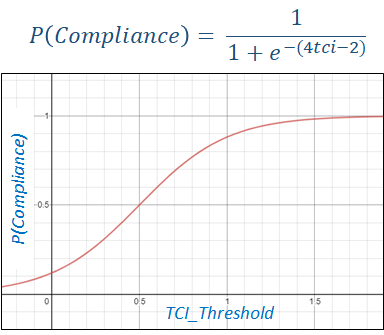

In [58]:
tci_thresholds=[0.3,0.5,0.7]
for i in range(1,len(rules)):
    print_rule(rules[i],i)
for tci_threshold in tci_thresholds:
    print("\nFor tci_threshold={}".format(tci_threshold))
    C,l=Lik_func(tci_threshold,possible_orders,A,B)

------------------------------------------------
                NORM Number=1
------------------------------------------------
    PROHIBITED to
    MOVE R-SQUAREs

------------------------------------------------
                NORM Number=2
------------------------------------------------
    OBLIGATORY to
    THROW G-SQUAREs
    if you PICKUP G-SQUAREs


For tci_threshold=0.3
For n1=19512,m1=7128,m=7128,p(C)=0.31003
--------------Likelihood of Norm=0.00006939--------------

For tci_threshold=0.5
For n1=19512,m1=7128,m=1944,p(C)=0.50000
--------------Likelihood of Norm=0.00028051--------------

For tci_threshold=0.7
For n1=19512,m1=7128,m=0,p(C)=0.68997
--------------Likelihood of Norm=nan--------------
